<a href="https://colab.research.google.com/github/Aru0504/Explanatory-Data-Analysis-Netflix/blob/main/Netflix_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings("ignore")

In [2]:
print(f'numpy : {np.__version__}')
print(f'pandas : {pd.__version__}')
print(f'seaborn : {sns.__version__}')
print(f'matplotlib : {mpl.__version__}')

numpy : 1.18.5
pandas : 1.1.4
seaborn : 0.11.0
matplotlib : 3.2.2


In [3]:
data = pd.read_csv('netflix_titles.csv')
print(data.shape)

(6234, 12)


In [4]:
plt.rc('font', size=12) #controls default text sizes
plt.rc('axes', titlesize=14) #fontsize of the axes title
plt.rc('axes', labelsize=12) #fontsize of the x and y labels
plt.rc('xtick', labelsize=12) #fontsize of the tick labels
plt.rc('ytick', labelsize=12) #fontsize of the tick labels
plt.rc('legend', fontsize=12) #legend fontsize
plt.rc('figure', titlesize=14) #fontsize of the figure title
plt.rcParams['figure.dpi'] = 300 #high resolution
sns.set_style('whitegrid')

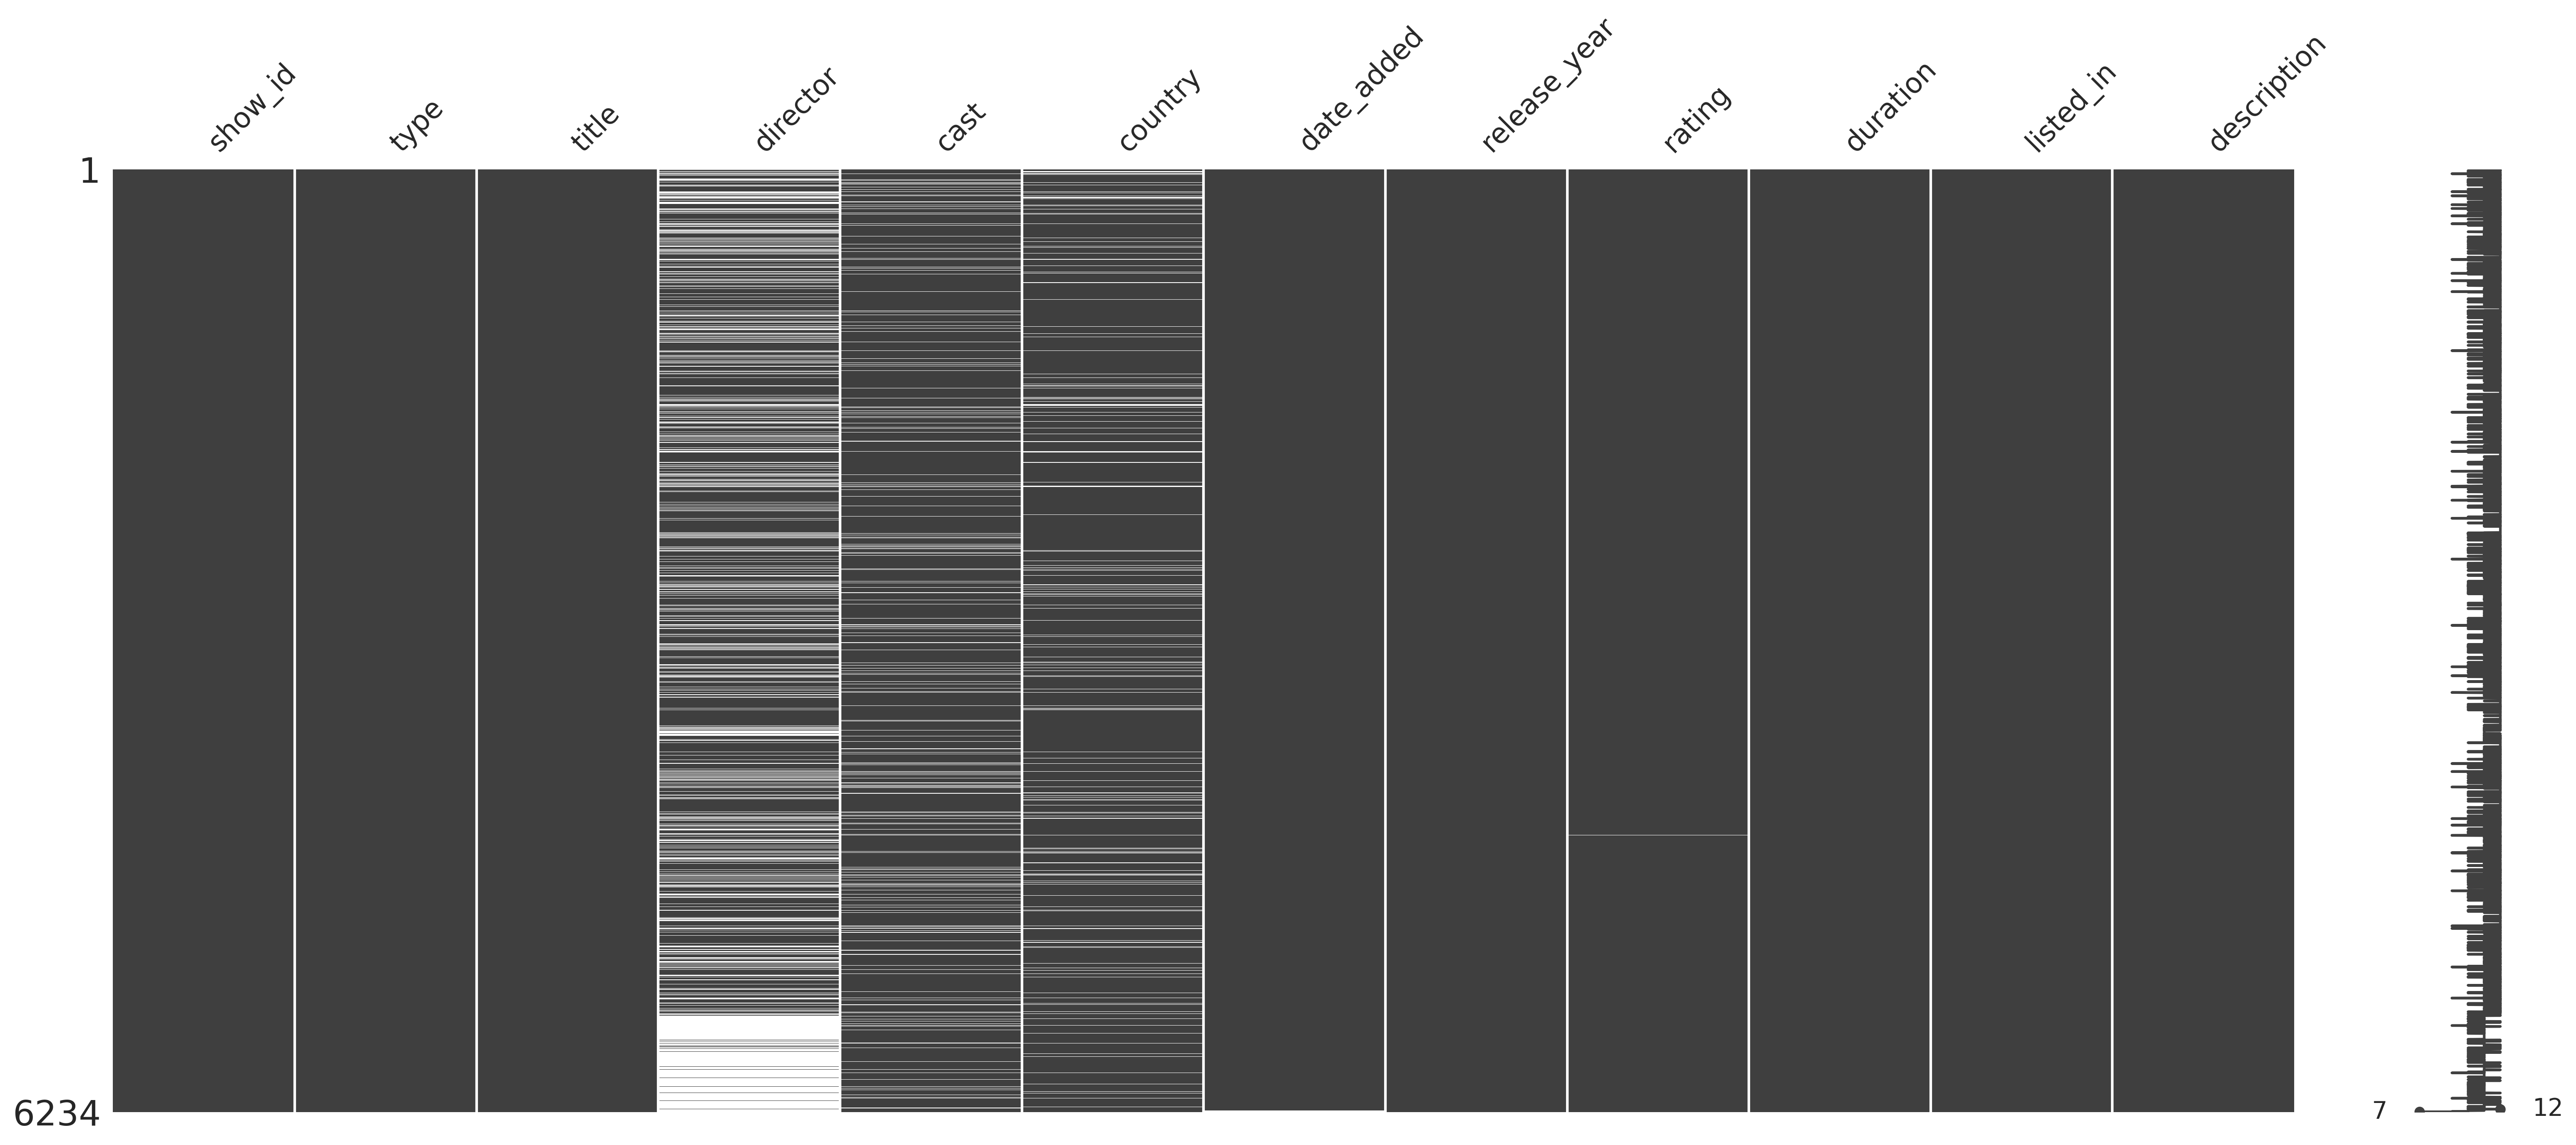

In [5]:
msno.matrix(data)
plt.show()

In [6]:
for i in data.columns:
    null_rate = data[i].isna().sum() / len(data) * 100 
    if null_rate > 0 :
        print(f"{i}'s null rate : {null_rate}%")

director's null rate : 31.584857234520374%
cast's null rate : 9.143407122232915%
country's null rate : 7.635547000320821%
date_added's null rate : 0.17645171639396856%
rating's null rate : 0.16041065126724416%


In [7]:
data.head()

show_id  ...                                        description
0  81145628  ...  Before planning an awesome wedding for his gra...
1  80117401  ...  Jandino Asporaat riffs on the challenges of ra...
2  70234439  ...  With the help of three human allies, the Autob...
3  80058654  ...  When a prison ship crash unleashes hundreds of...
4  80125979  ...  When nerdy high schooler Dani finally attracts...

[5 rows x 12 columns]

In [8]:
data.describe(include='all').head(4)

show_id  ...                                        description
count    6234.0  ...                                               6234
unique      NaN  ...                                               6226
top         NaN  ...  A surly septuagenarian gets another chance at ...
freq        NaN  ...                                                  3

[4 rows x 12 columns]

In [9]:
data = data.fillna('NULL')
data['year_added'] = data['date_added'].apply(lambda x :  x.split(',')[-1])
data['year_added'] = data['year_added'].apply(lambda x : x if x != 'NULL' else '2020')
data['year_added'] = data['year_added'].apply(int)

In [10]:
movie = data[data['type'] == 'Movie']
tv_show = data[data['type'] == 'TV Show']

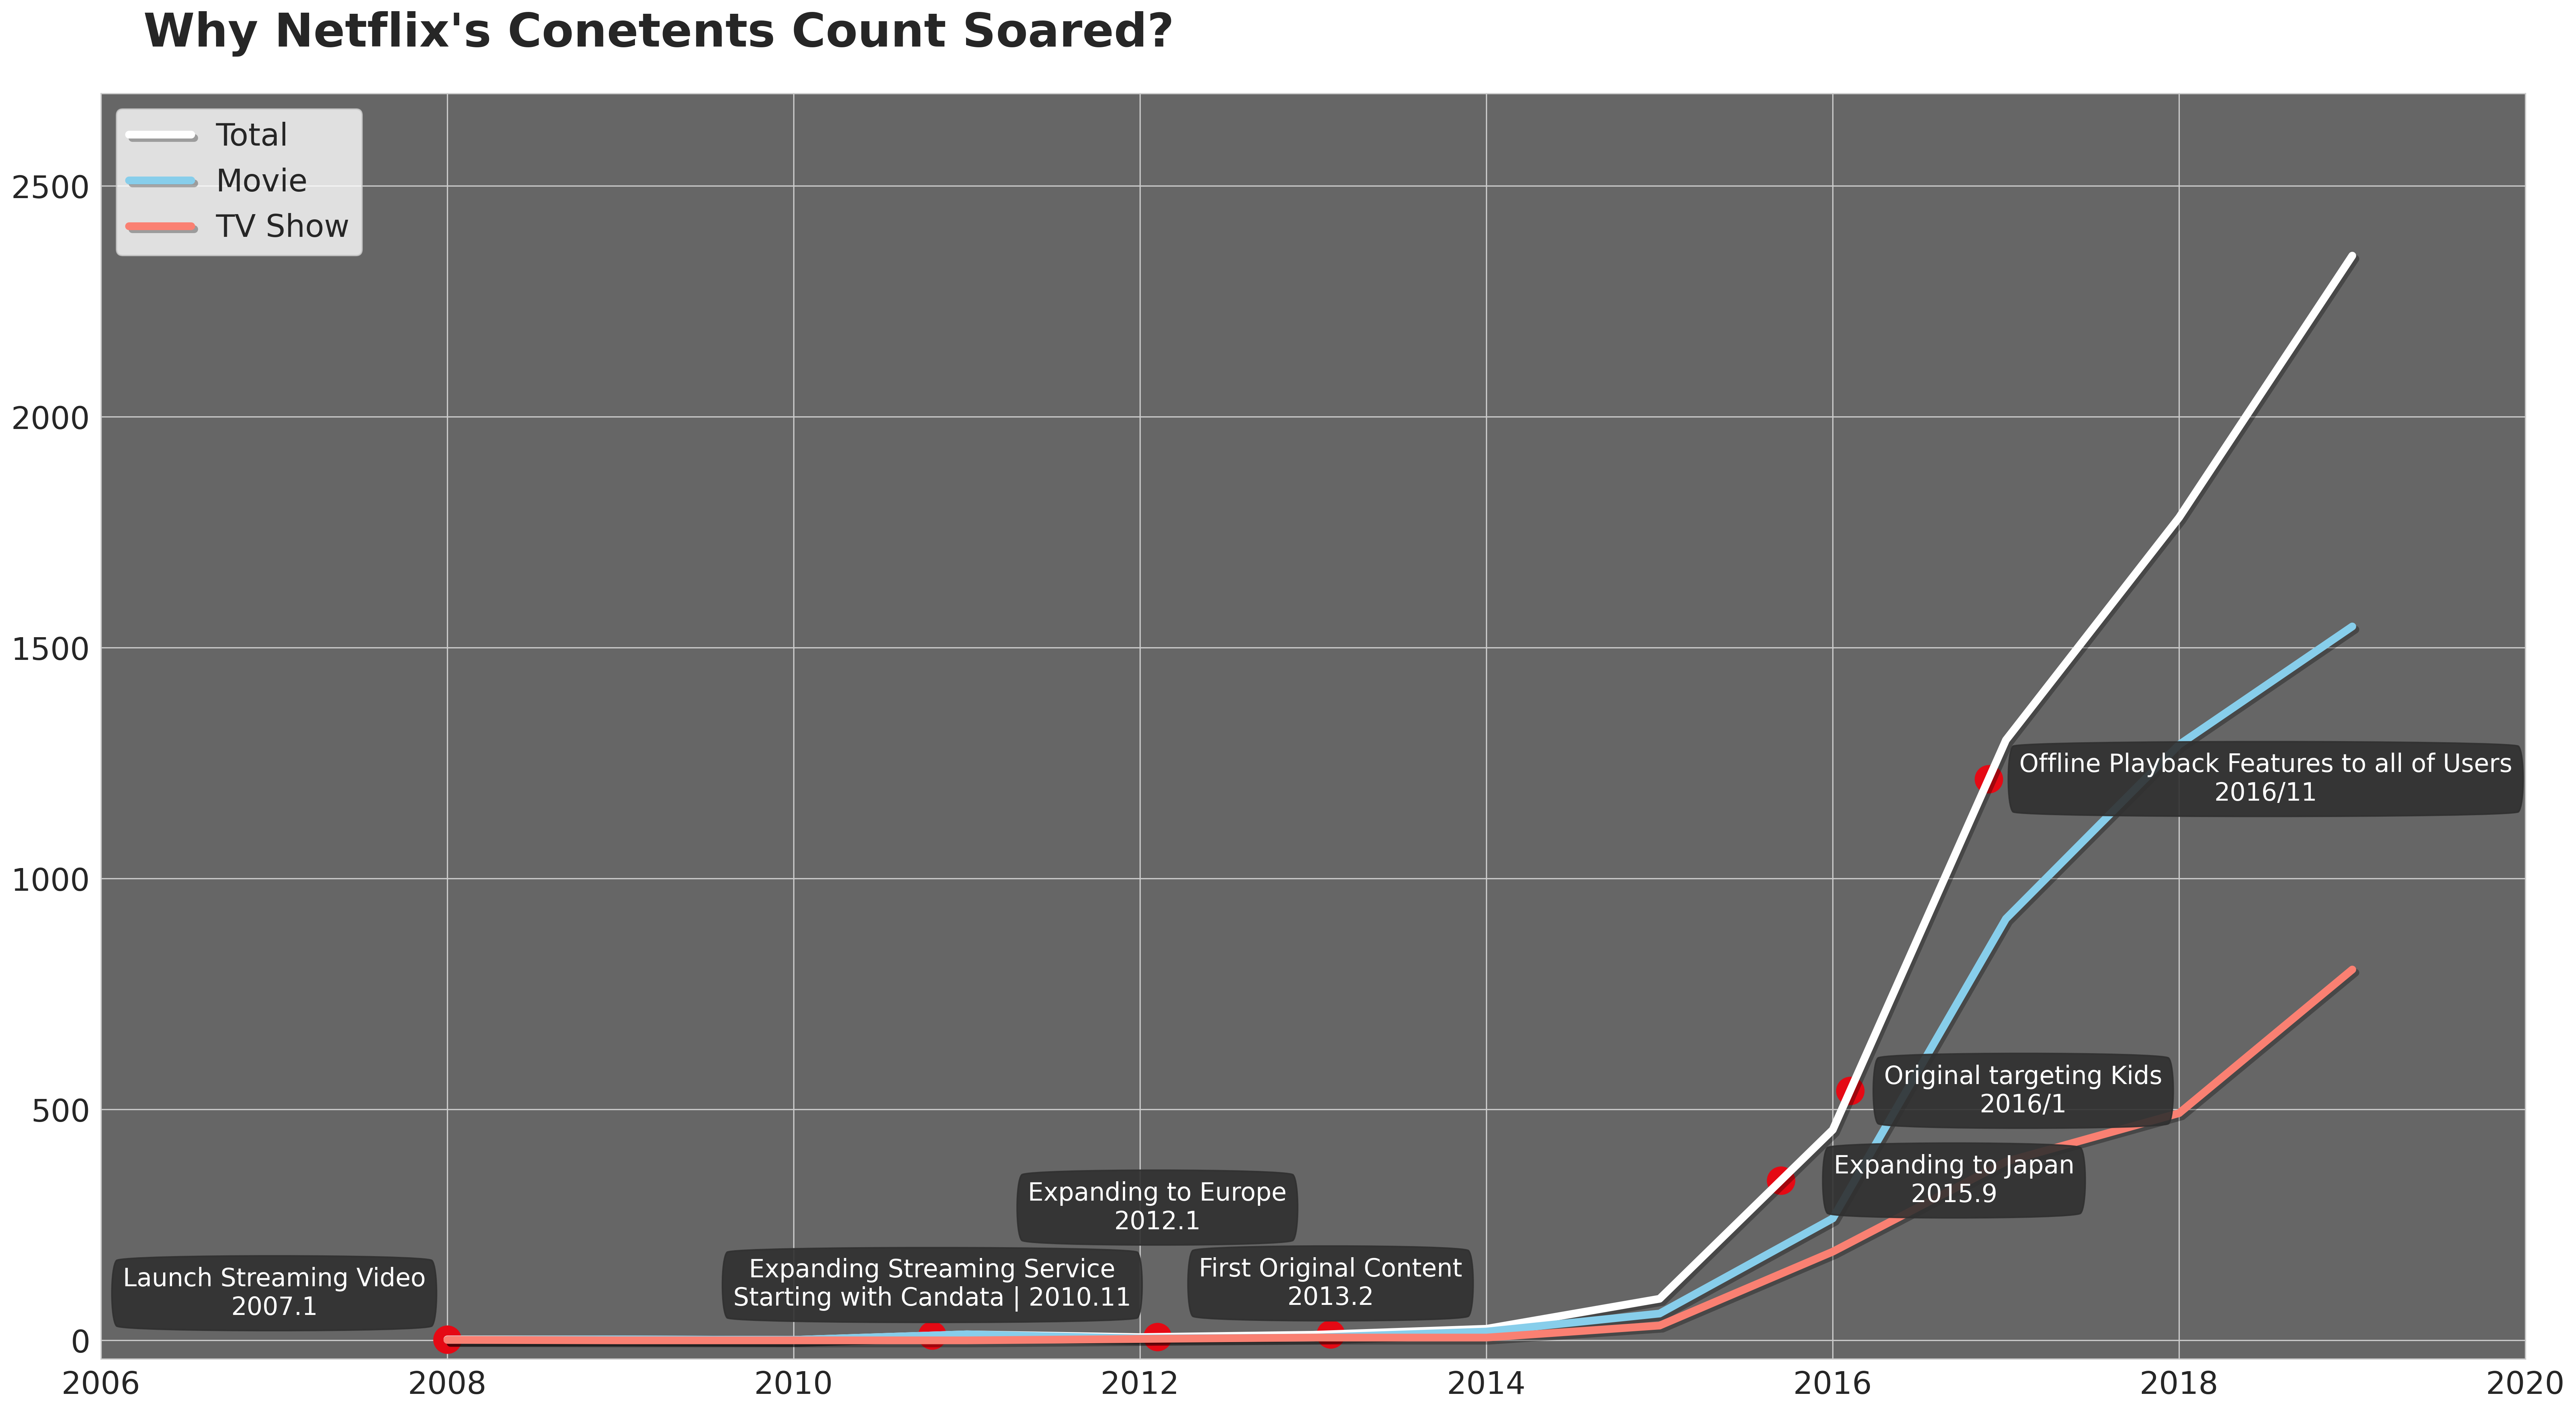

In [11]:
import matplotlib.patheffects as path_effects
year_data = data['year_added'].value_counts().sort_index().loc[:2019]
type_data = data.groupby('type')['year_added'].value_counts().sort_index().unstack().fillna(0).T.loc[:2019] 

fig, ax = plt.subplots(1,1, figsize=(28, 15))
ax.plot(year_data.index, year_data,  color="white", linewidth=5, label='Total', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
ax.plot(type_data.index, type_data['Movie'], color='skyblue', linewidth=5, label='Movie', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])
ax.plot(type_data.index, type_data['TV Show'], color='salmon', linewidth=5, label='TV Show', path_effects=[path_effects.SimpleLineShadow(),
                       path_effects.Normal()])

ax.set_xlim(2006, 2020)
ax.set_ylim(-40, 2700)

t = [
    2008,
    2010.8,
    2012.1,
    2013.1,
    2015.7,
    2016.1,
    2016.9
]

events = [
    "Launch Streaming Video\n2007.1",
    "Expanding Streaming Service\nStarting with Candata | 2010.11",
    "Expanding to Europe\n2012.1",
    "First Original Content\n2013.2",
    "Expanding to Japan\n2015.9",
    "Original targeting Kids\n2016/1",
    "Offline Playback Features to all of Users\n2016/11"
]

up_down = [100, 110, 280, 110, 0, 0, 0]

left_right = [ -1, 0, 0, 0, 1, 1, 1.6 ]

for t_i, event_i, ud_i, lr_i in zip(t, events, up_down, left_right):
    ax.annotate(event_i,
                xy=(t_i + lr_i, year_data[int(t_i)] * (int(t_i+1)-t_i) + year_data[int(t_i)+1]  * (t_i-int(t_i)) + ud_i),
                xytext=(0,0), textcoords='offset points',
                va="center", ha="center",
                color="w", fontsize=16,
                bbox=dict(boxstyle='round4', pad=0.5, color='#303030', alpha=0.90))
    
    # A proportional expression to draw the middle of the year
    ax.scatter(t_i, year_data[int(t_i)] * (int(t_i+1)-t_i) + year_data[int(t_i)+1]  * (t_i-int(t_i)), color='#E50914', s=300)

ax.set_facecolor((0.4, 0.4, 0.4))
ax.set_title("Why Netflix's Conetents Count Soared?", position=(0.23, 1.0+0.03), fontsize=30, fontweight='bold')
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_tick_params(labelsize=20)
plt.legend(loc='upper left', fontsize=20)

plt.show()

In [12]:
from collections import Counter
country_data = data['country']
country_counting = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
country_counting.drop(['NULL'], axis=0, inplace=True)

In [13]:
tot = sum(country_counting)
top20 = sum(country_counting[:20]) # 22 is real 20% but for simple processing

print(f'total : {tot}')
print(f'top 20 countries : {top20}')
print(f'percentage : {top20}/{tot} = {100 * top20/tot}')

total : 7182
top 20 countries : 6318
percentage : 6318/7182 = 87.96992481203007


In [14]:
top20_country = country_counting[:20]

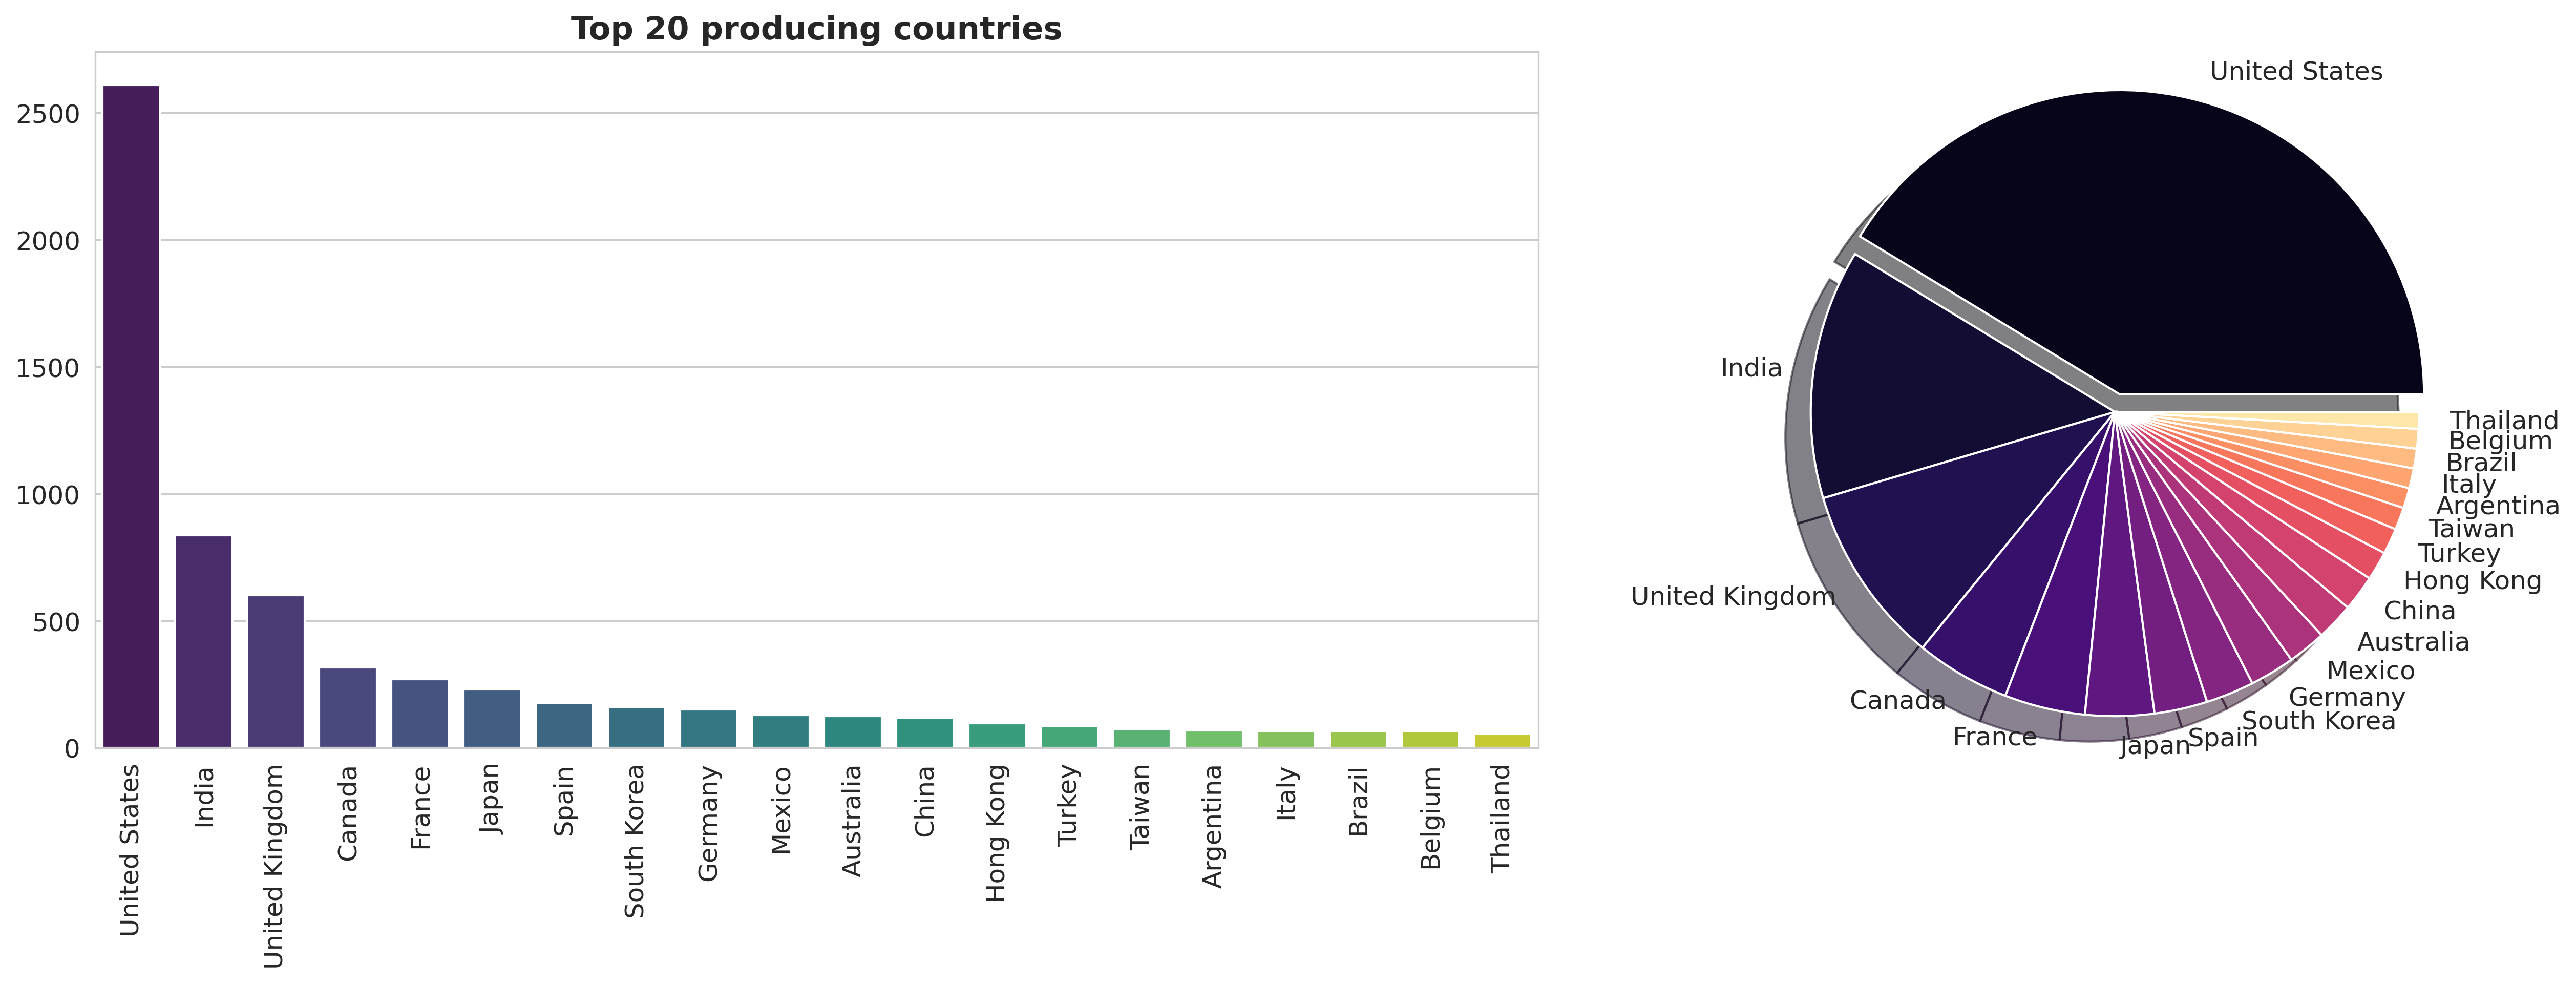

In [15]:
from matplotlib import gridspec

fig = plt.figure(figsize=(20, 6))
gs = gridspec.GridSpec(nrows=1, ncols=2,
                       height_ratios=[6], 
                       width_ratios=[10, 5])

ax = plt.subplot(gs[0])
sns.barplot(top20_country.index, top20_country, ax=ax, palette="viridis")
ax.set_xticklabels(top20_country.index, rotation='90')
ax.set_title('Top 20 producing countries', fontsize=15, fontweight='bold')

explode = [0 for _ in range(20)]
explode[0] = 0.06

ax2 = plt.subplot(gs[1])
ax2.pie(top20_country, labels=top20_country.index,
        shadow=True, startangle=0, explode=explode,
        colors=sns.color_palette("magma", n_colors=20)
       )
ax2.axis('equal') 

plt.show()

In [16]:
!pip install squarify

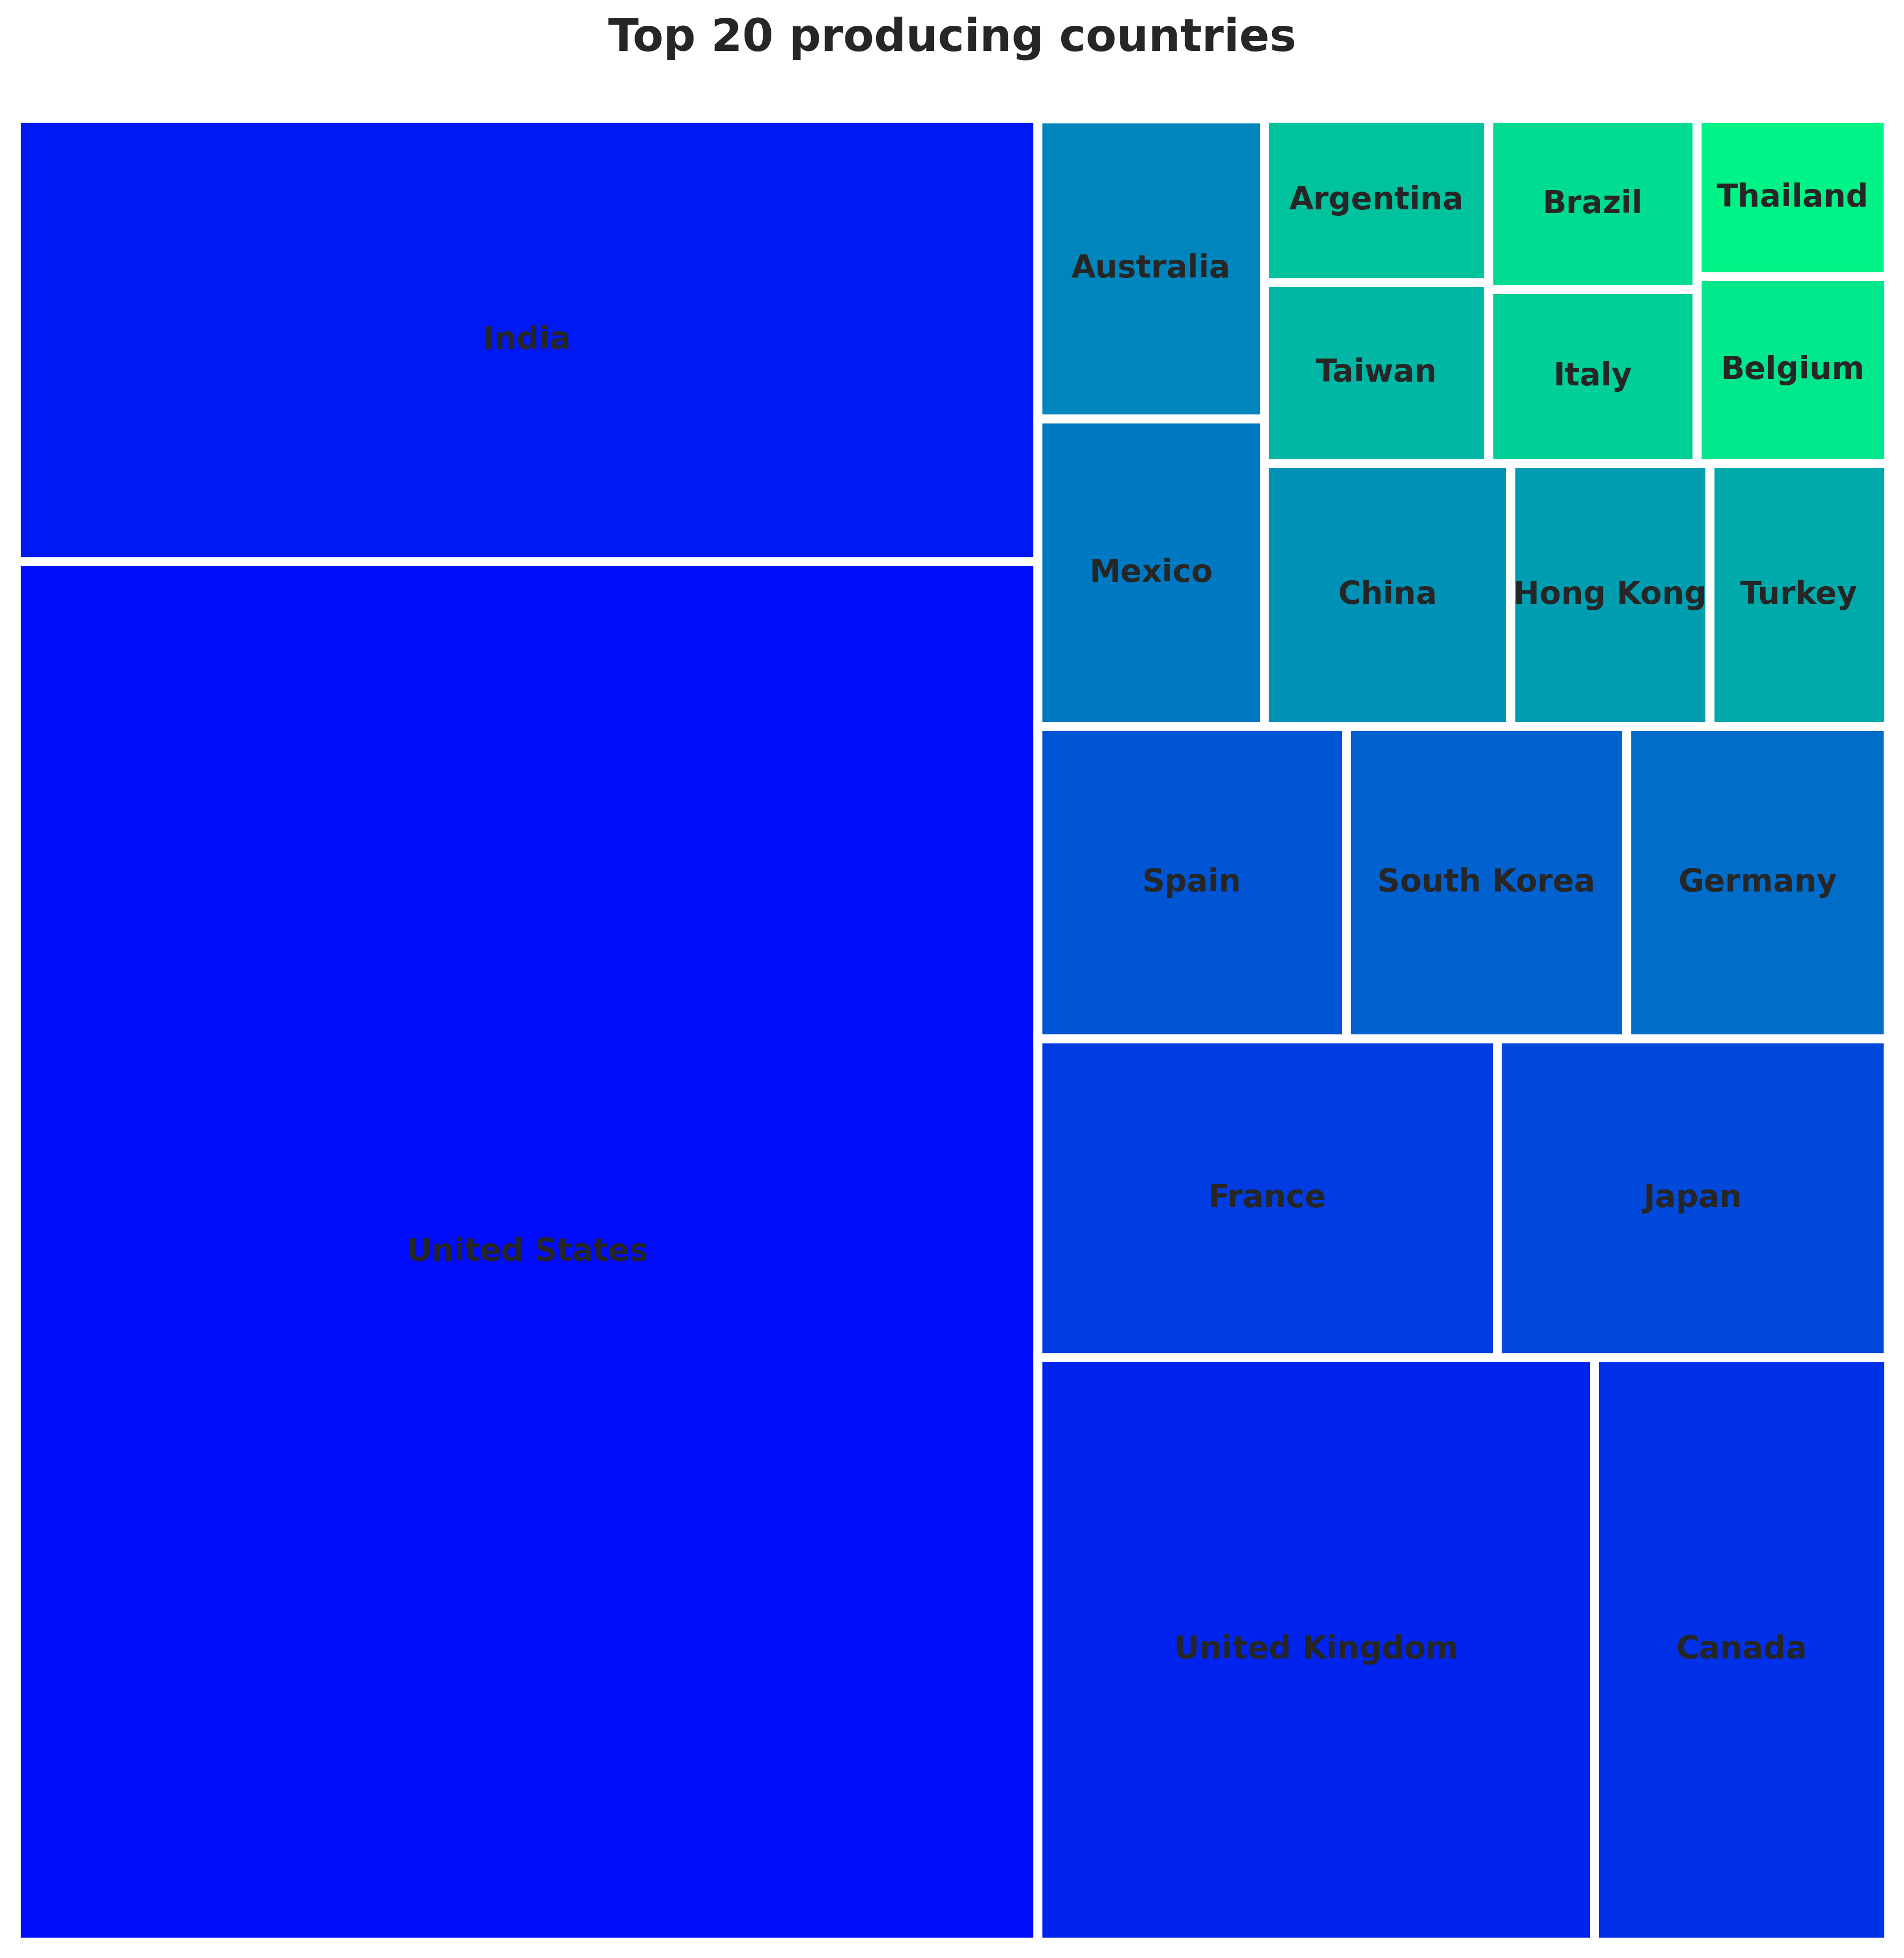

In [17]:
import squarify

y = top20_country
fig = plt.figure(figsize=(15, 15))
squarify.plot(sizes = y.values, label = y.index, color=sns.color_palette("winter", n_colors=20),
             linewidth=4, text_kwargs={'fontsize':14, 'fontweight' : 'bold'})
plt.title('Top 20 producing countries', position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold')
plt.axis('off')
plt.show()

In [18]:
!pip install pywaffle
from pywaffle import Waffle

     |████████████████████████████████| 532kB 12.6MB/s 


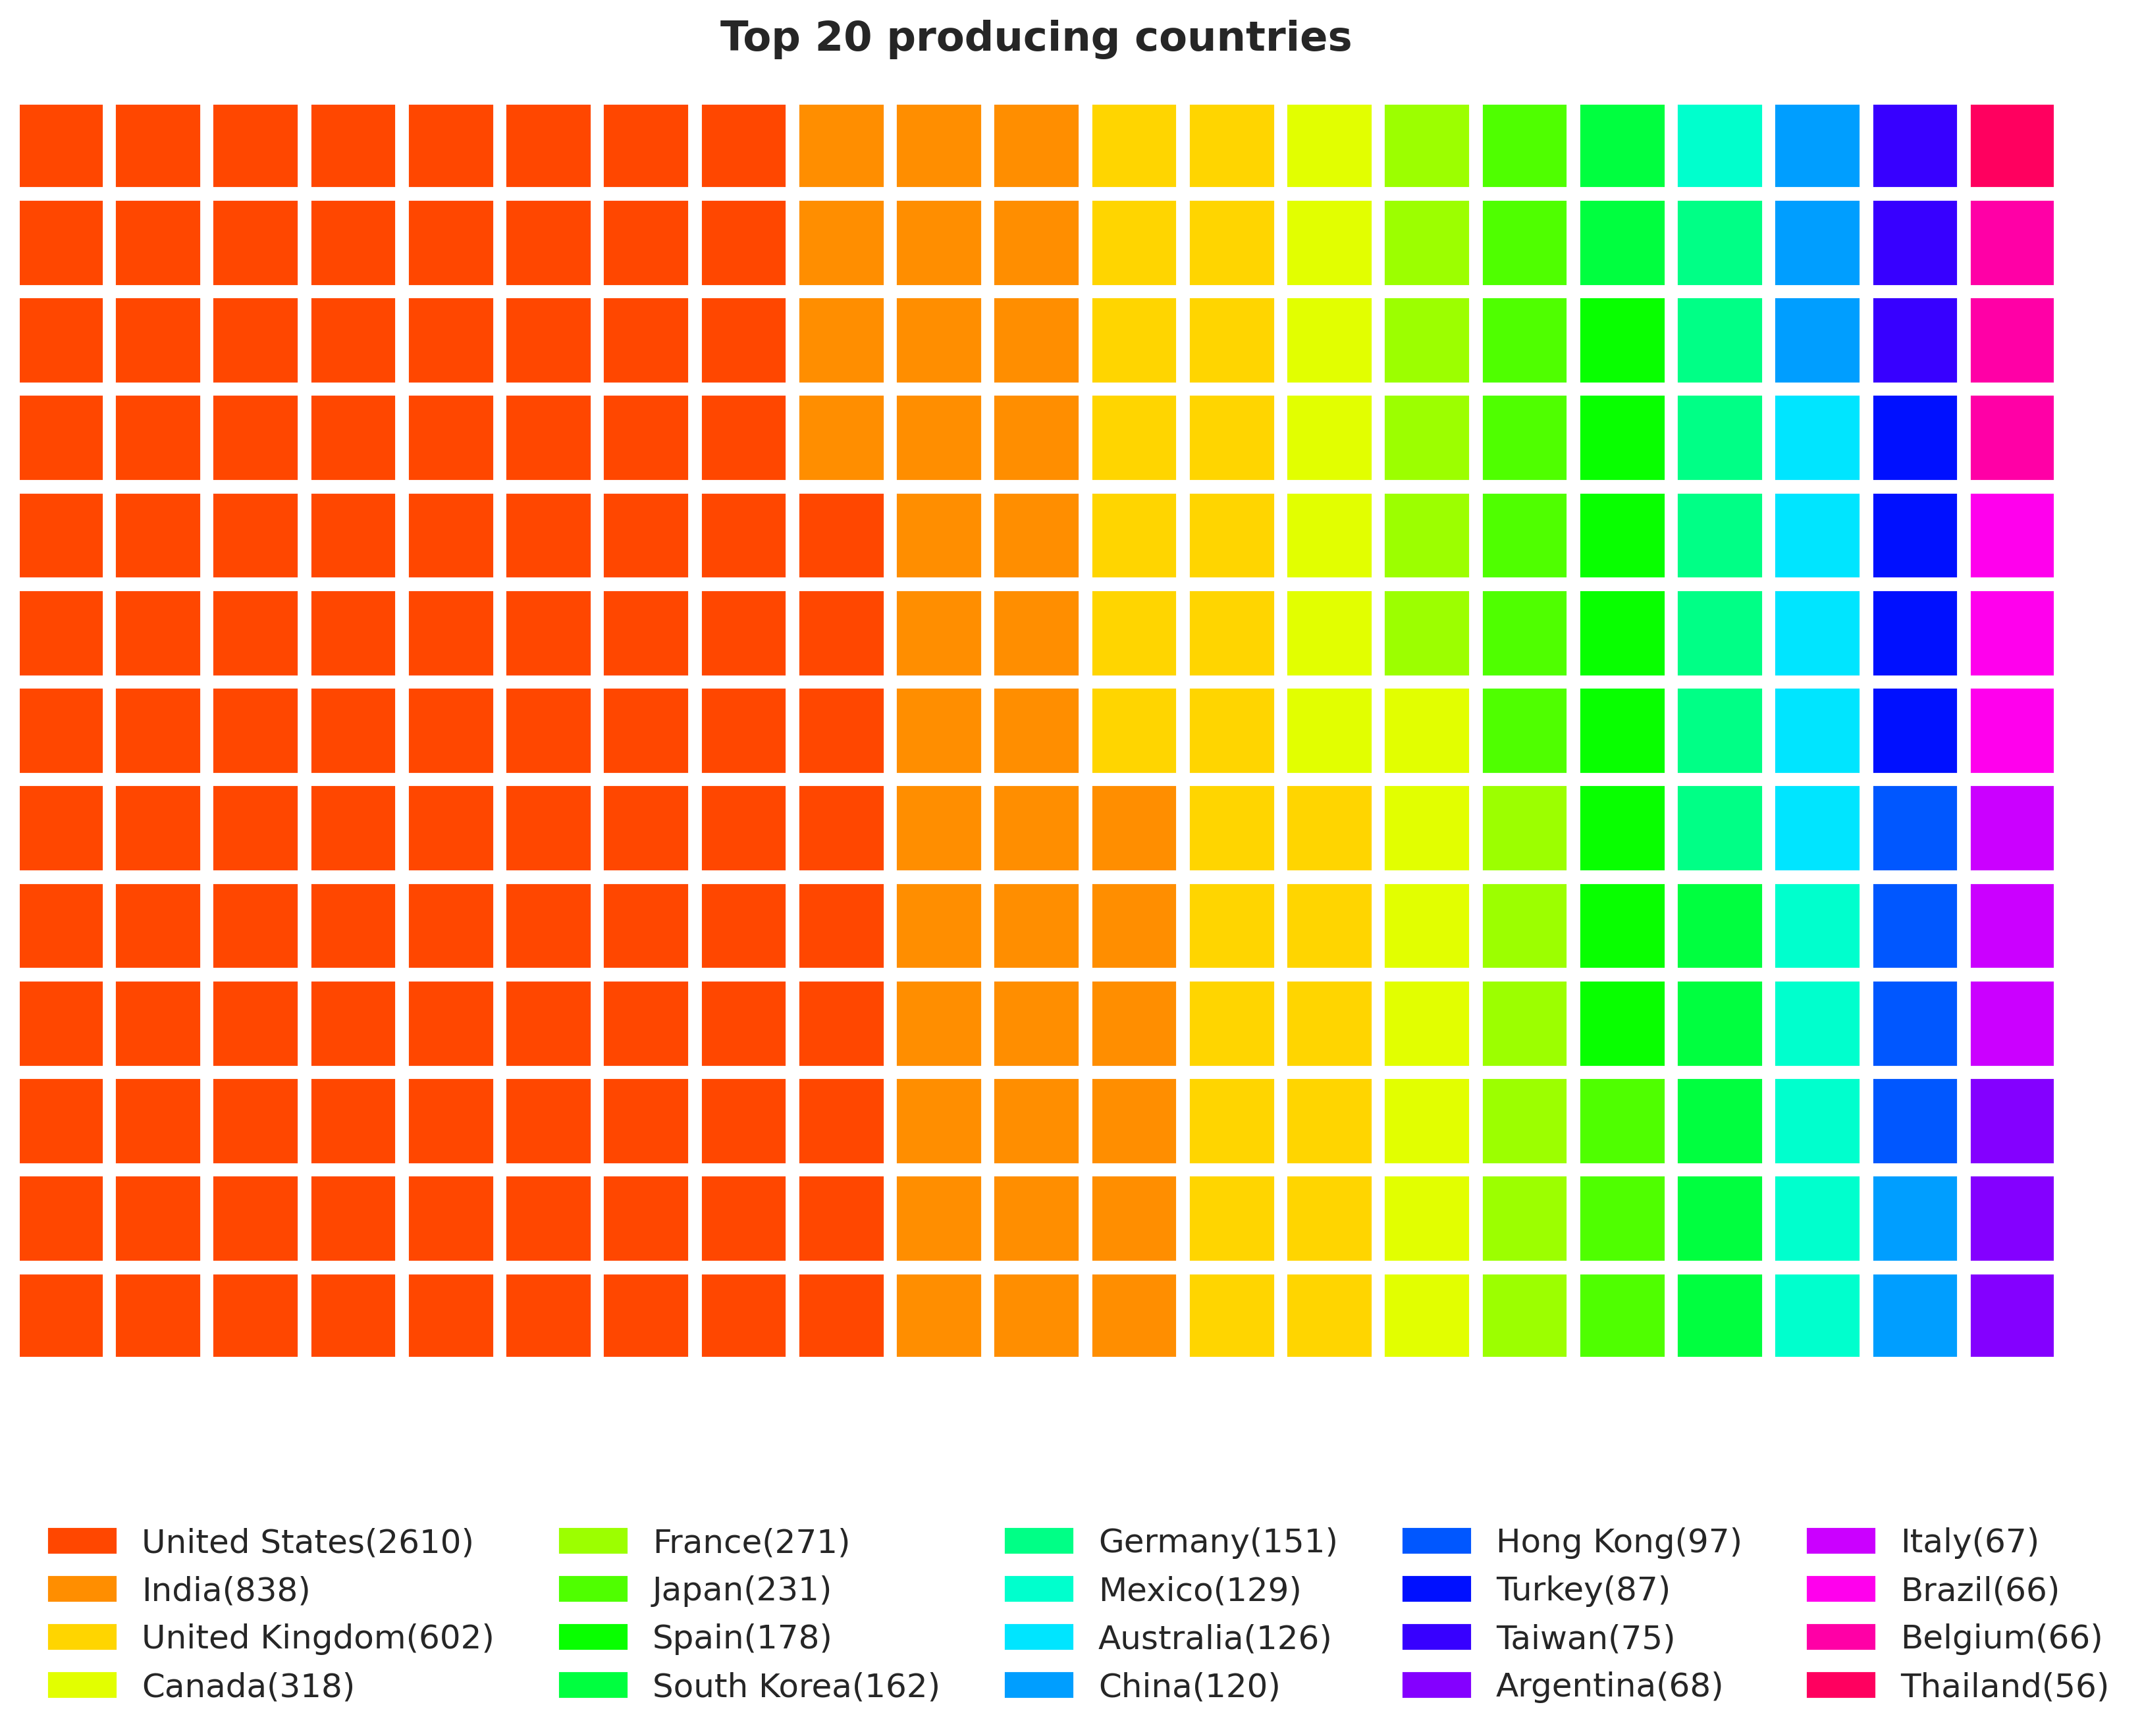

In [19]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=13, 
    columns=21, 
    values=y,
    labels=["{}({})".format(a, b) for a, b in zip(y.index, y) ],
    colors=sns.color_palette("hsv", n_colors=20),
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.3), 'ncol': len(y)//4,  'framealpha': 0},
    font_size=15, 
    figsize=(12, 12),  
    icon_legend=True
)

plt.title('Top 20 producing countries', position=(0.5, 1.0+0.03), fontsize = 15, fontweight='bold')
plt.show()

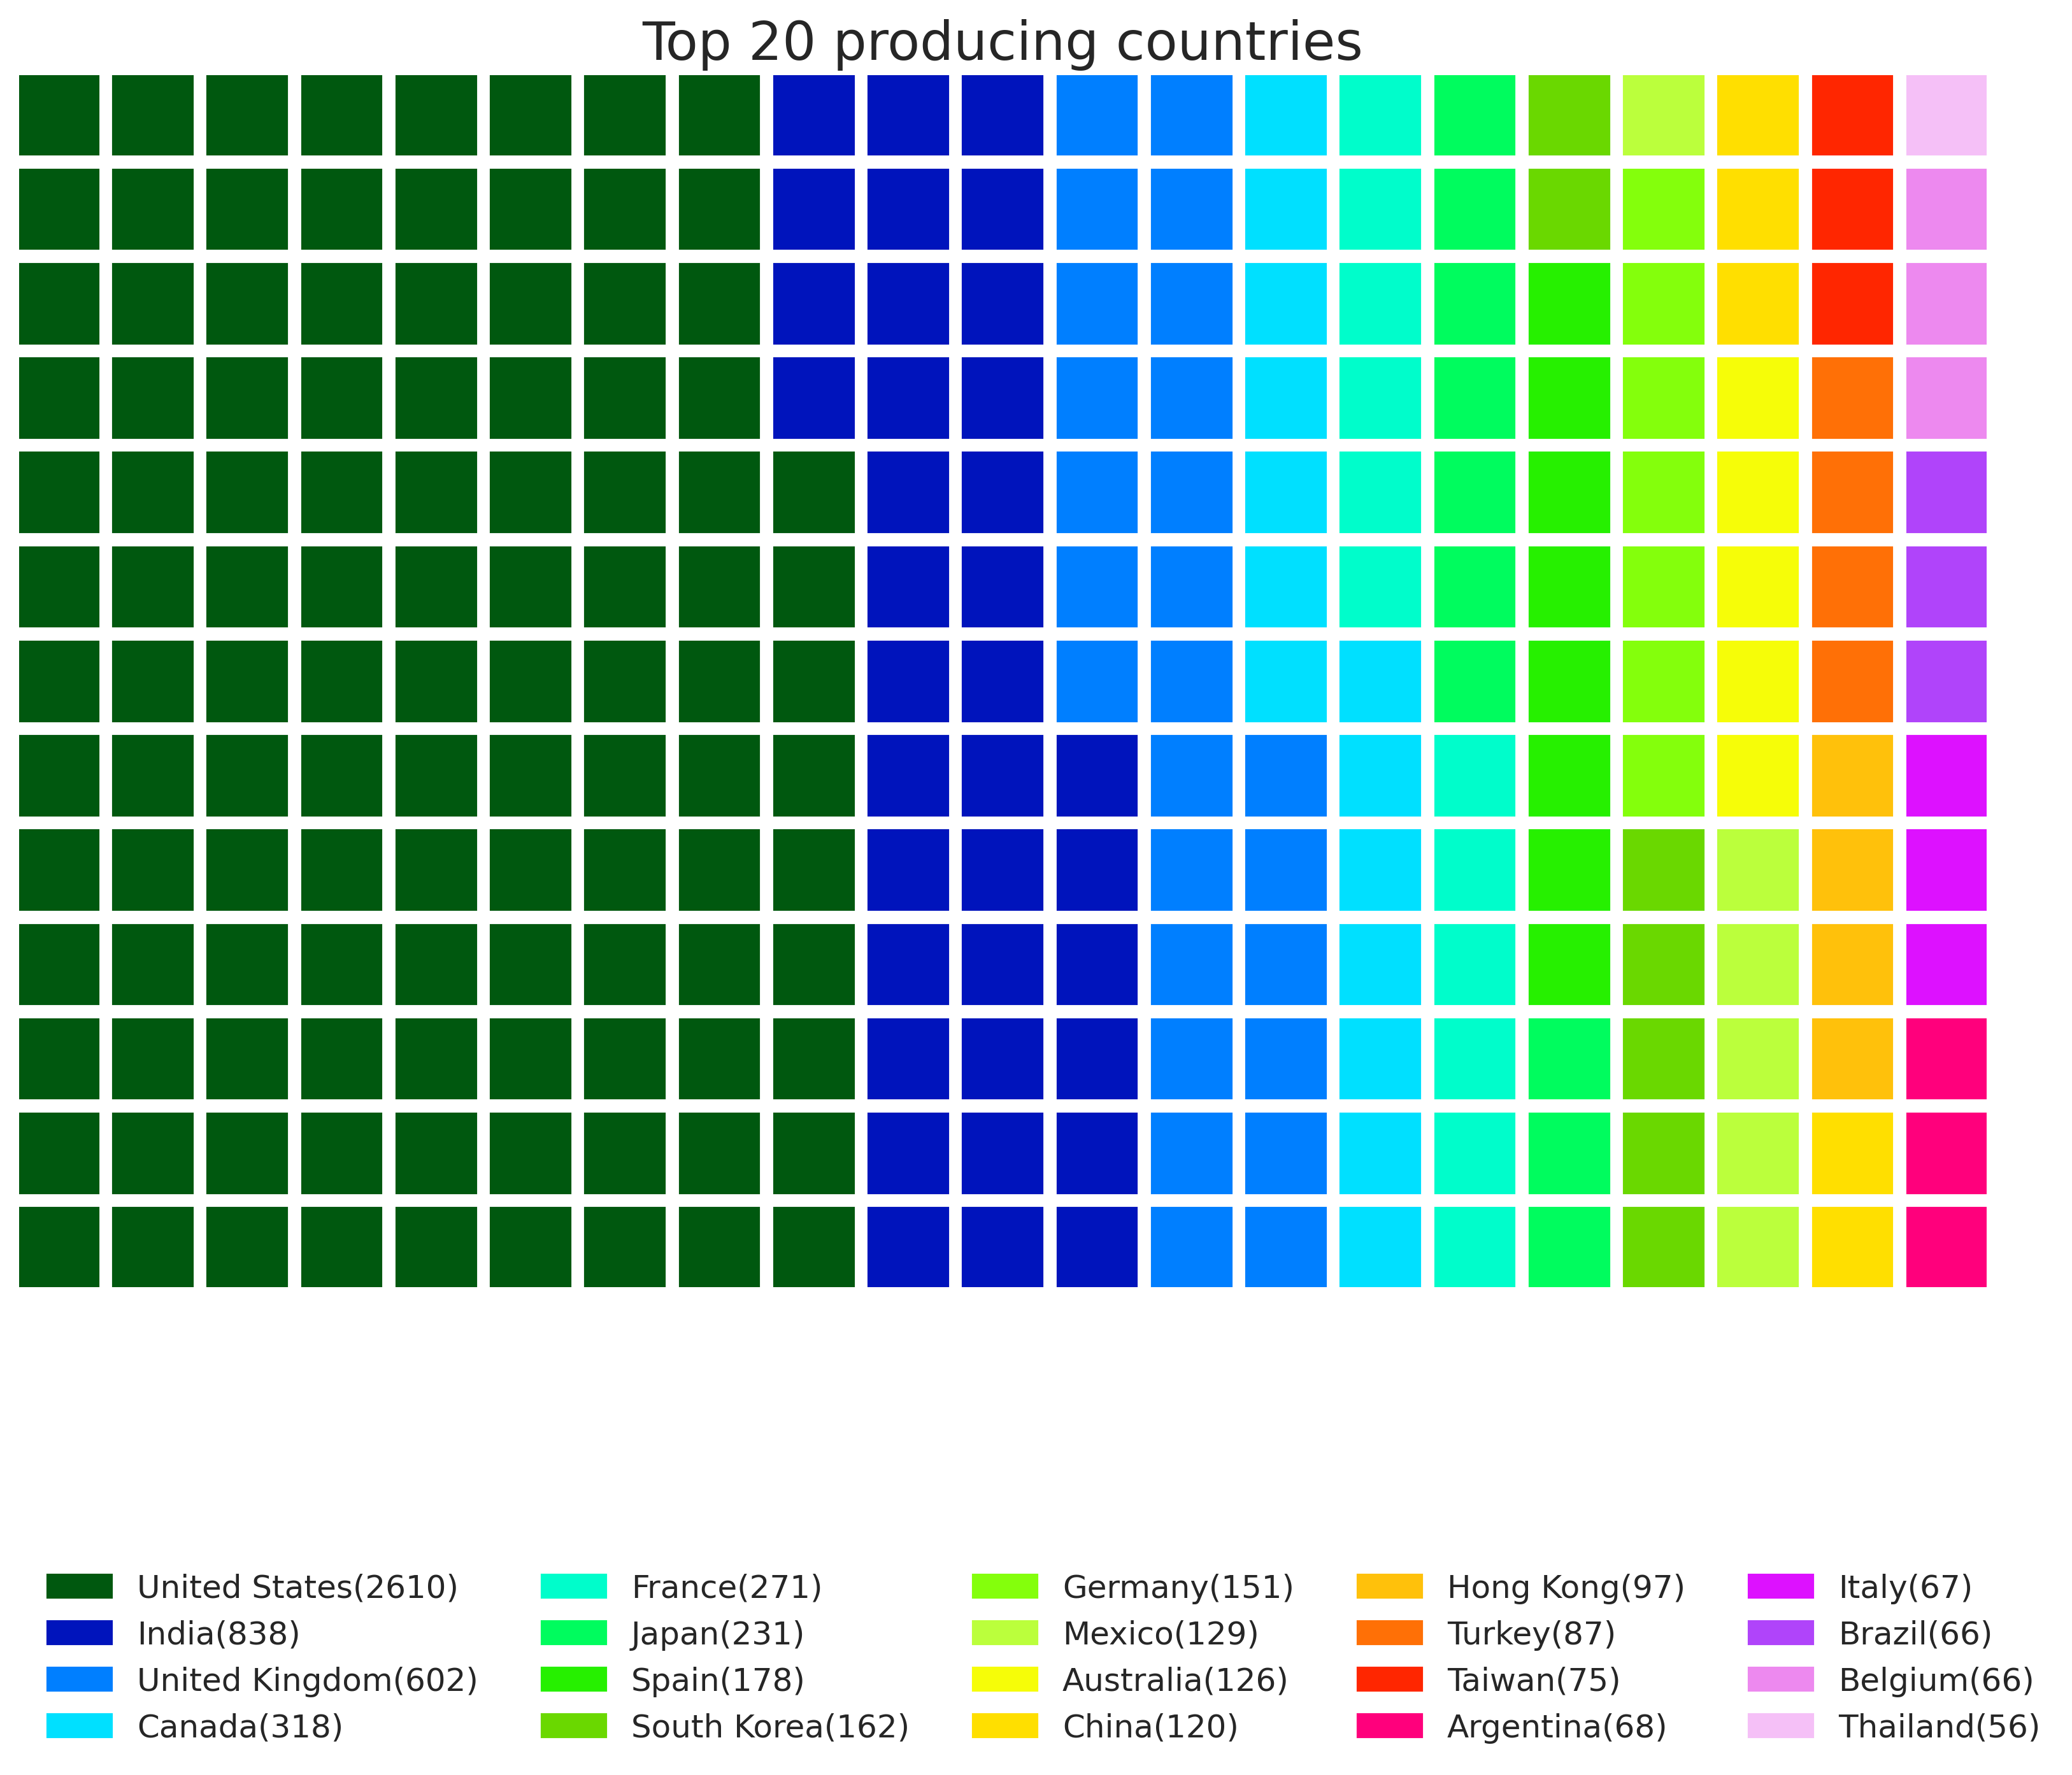

In [20]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=13, 
    columns=21, 
    values=y,
    labels=["{}({})".format(a, b) for a, b in zip(y.index, y) ],
    colors=sns.color_palette("gist_ncar", n_colors=20),
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(y)//4,  'framealpha': 0},
    font_size=20, 
    figsize=(12, 12),  
    icon_legend=True
)

plt.title('Top 20 producing countries', fontsize = 20)
plt.show()


In [21]:
import altair as alt
alt.renderers.enable()

RendererRegistry.enable('colab')

In [22]:
data['country'] = data['country'].dropna().apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(','))
lst_col = 'country'
data2 = pd.DataFrame({
      col :  np.repeat(data[col].values, data[lst_col].str.len())
      for col in data.columns.drop(lst_col)}
    ).assign(**{lst_col:np.concatenate(data[lst_col].values)})[data.columns.tolist()]

In [23]:
year_country = data2.groupby('year_added')['country'].value_counts().reset_index(name='counts')
year_country['top20'] = year_country['country'].apply(lambda x : x in top20_country.index)

year_country = year_country[(year_country['year_added'] >= 1990) & year_country['top20'] & (year_country['year_added'] < 2020)]

alt.Chart(year_country).mark_area().encode(
    alt.X('year_added'),
    alt.Y('counts:Q', stack='center', axis=None),
    alt.Color('country:N',
        scale=alt.Scale(scheme='redgrey'),
        sort=list(top20_country.index)
    ),
).properties(
    height=350,
    width=600
)

alt.Chart(...)

In [24]:
alt.Chart(year_country).mark_area().encode(
    alt.X('year_added'),
    alt.Y('counts:Q', stack='normalize'),
    alt.Color('country:N',
        scale=alt.Scale(scheme='redgrey'),
        sort=list(top20_country.index)      
    ),
).properties(
    height=350,
    width=600
)

alt.Chart(...)

In [25]:
import plotly.express as px
year_country2 = data2.groupby('year_added')['country'].value_counts().reset_index(name='counts')

fig = px.choropleth(year_country2, locations="country", color="counts", 
                    locationmode='country names',
                    animation_frame='year_added',
                    range_color=[0,200],
                    color_continuous_scale=px.colors.sequential.GnBu
                   )

fig.update_layout(title='Comparison by country')
fig.show()

In [26]:
from sklearn.preprocessing import MultiLabelBinarizer # Similar to One-Hot Encoding

def relation_heatmap(df, title):
    df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) 
    Types = []
    for i in df['genre']: Types += i
    Types = set(Types)
    print(f"There are {len(Types)} types in the Netflix {title} Dataset")    
    test = df['genre']
    mlb = MultiLabelBinarizer()
    res = pd.DataFrame(mlb.fit_transform(test), columns=mlb.classes_, index=test.index)
    corr = res.corr()
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(15, 14))
    pl = sns.heatmap(corr, mask=mask, cmap= "Spectral", vmax=.5, vmin=-.5, center=0, square=True, linewidths=.7, cbar_kws={"shrink": 0.6})
    
    plt.show()

There are 20 types in the Netflix Movie Dataset


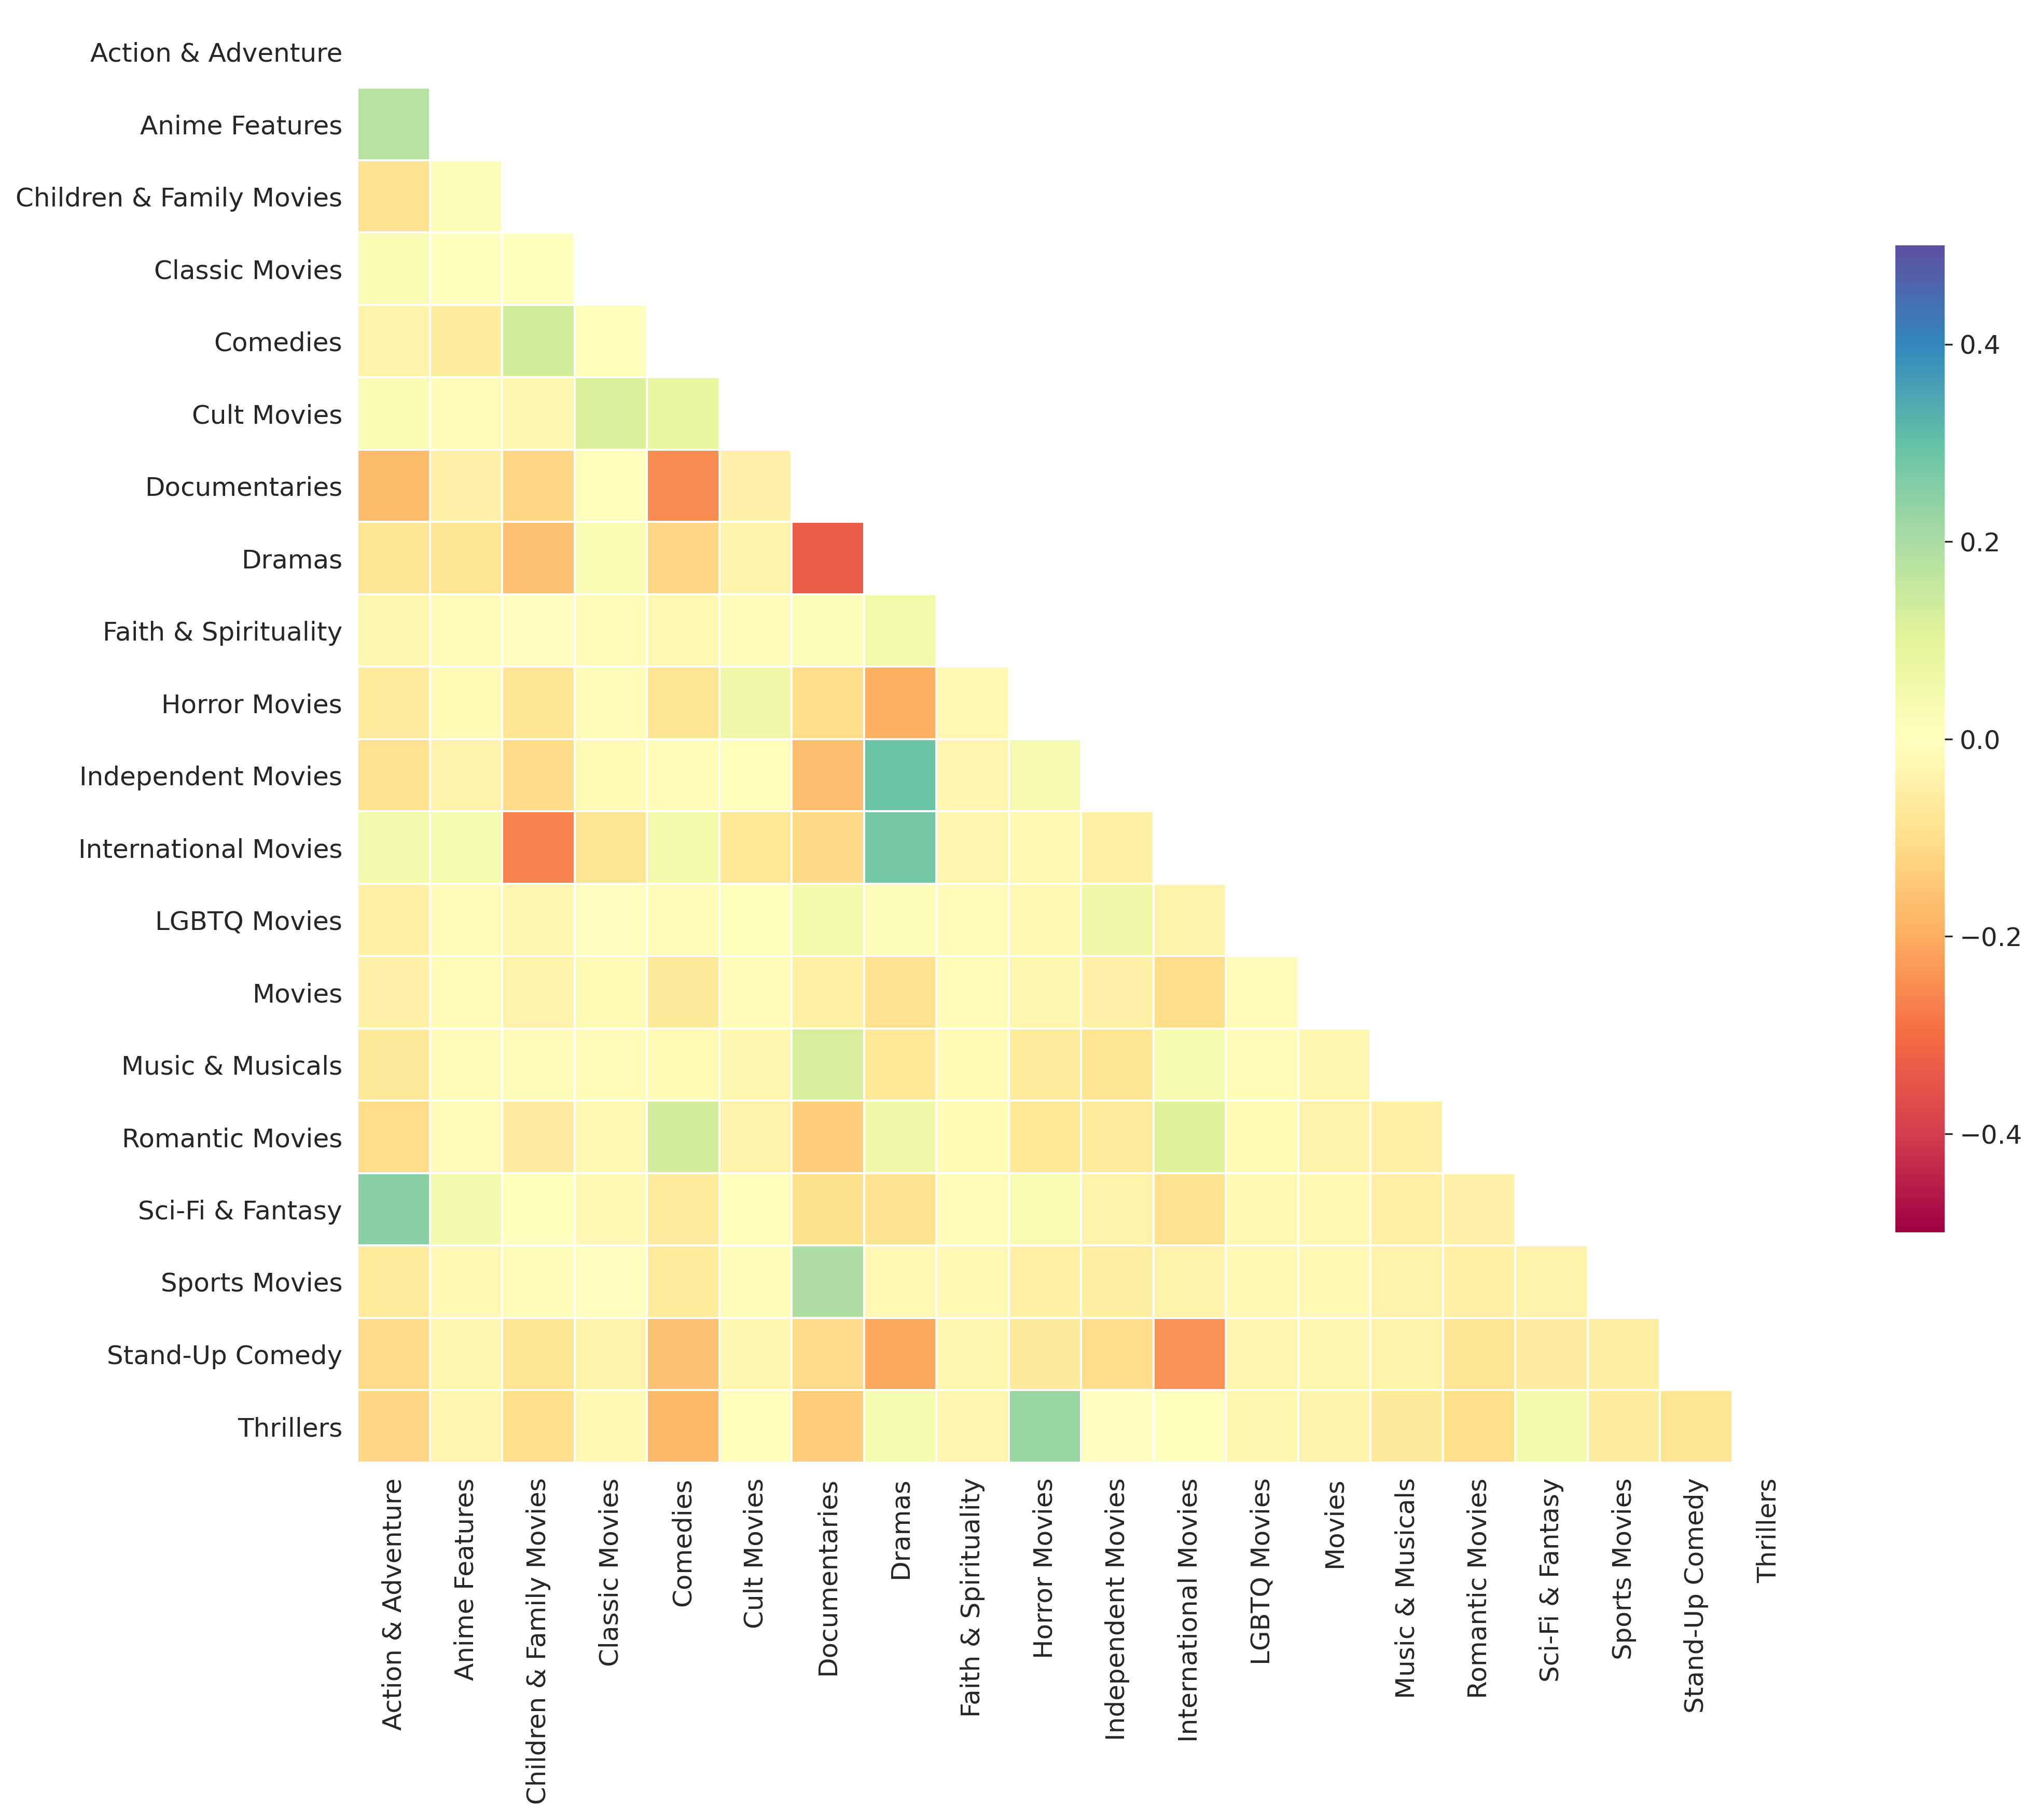

In [27]:
relation_heatmap(movie, 'Movie')

There are 22 types in the Netflix TV Show Dataset


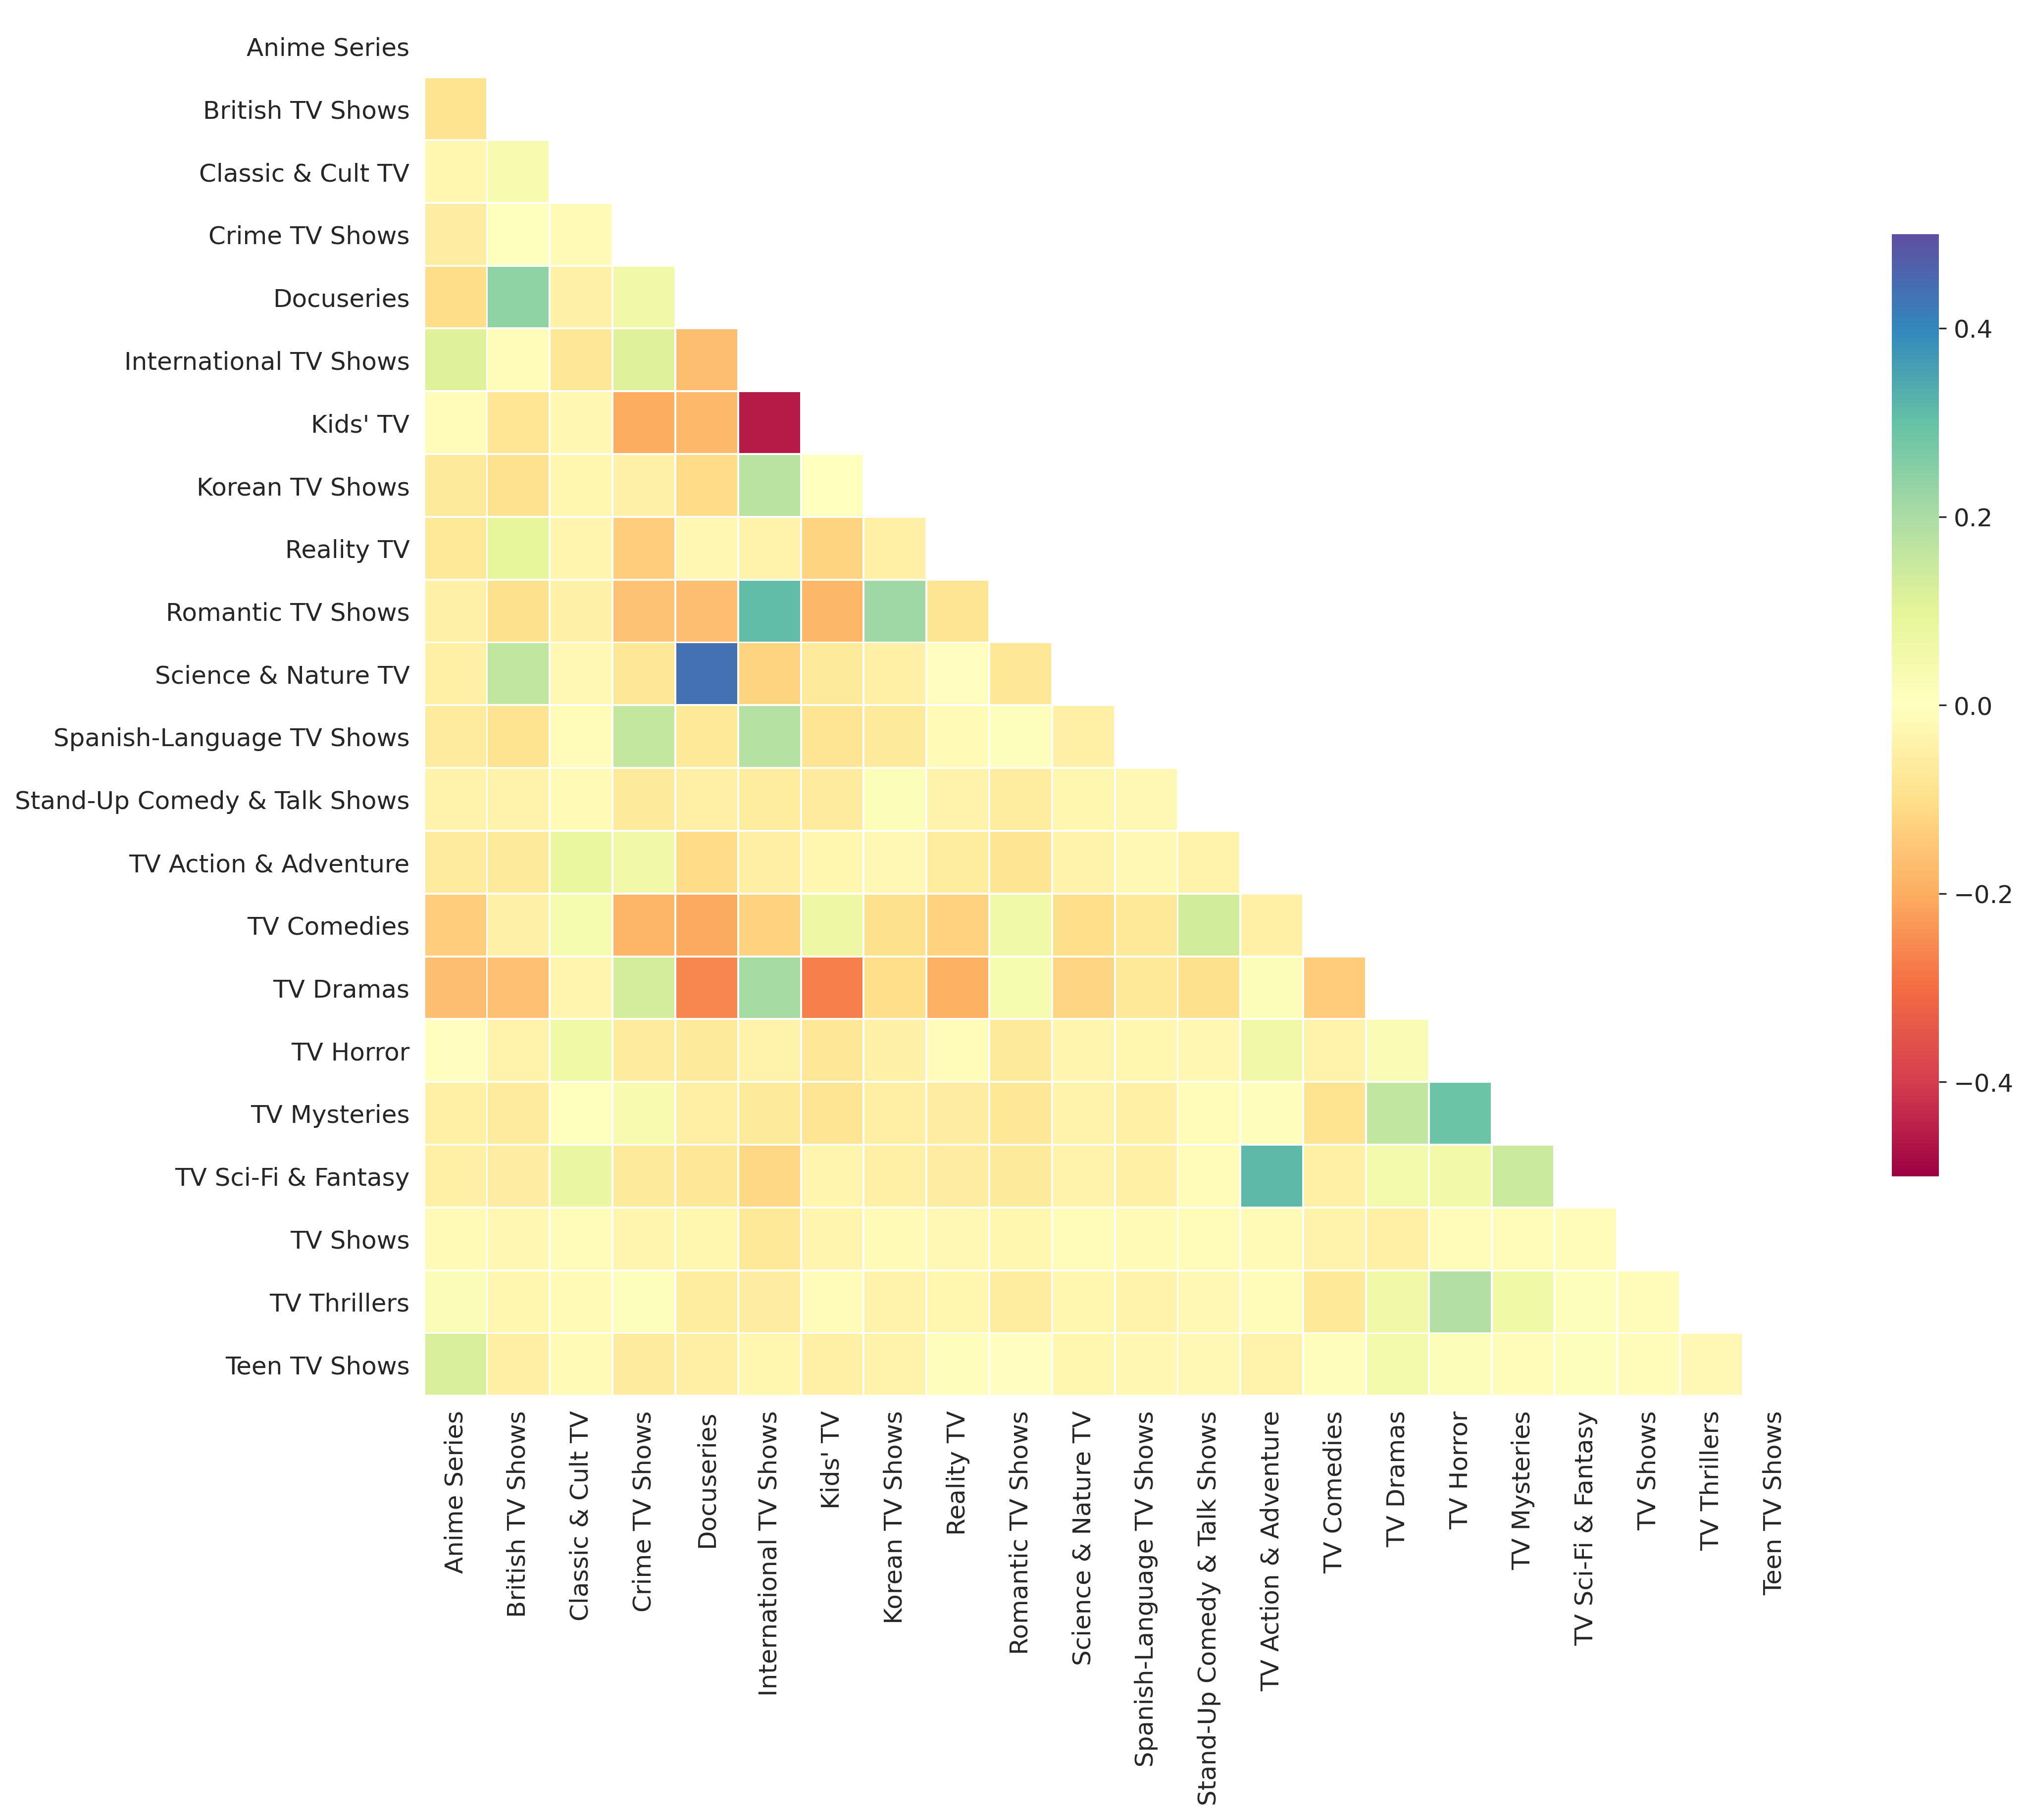

In [28]:
relation_heatmap(tv_show, 'TV Show')

In [29]:
rating_order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']

movie_rating = movie['rating'].value_counts()[rating_order]


In [30]:
  def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(20, 10))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()

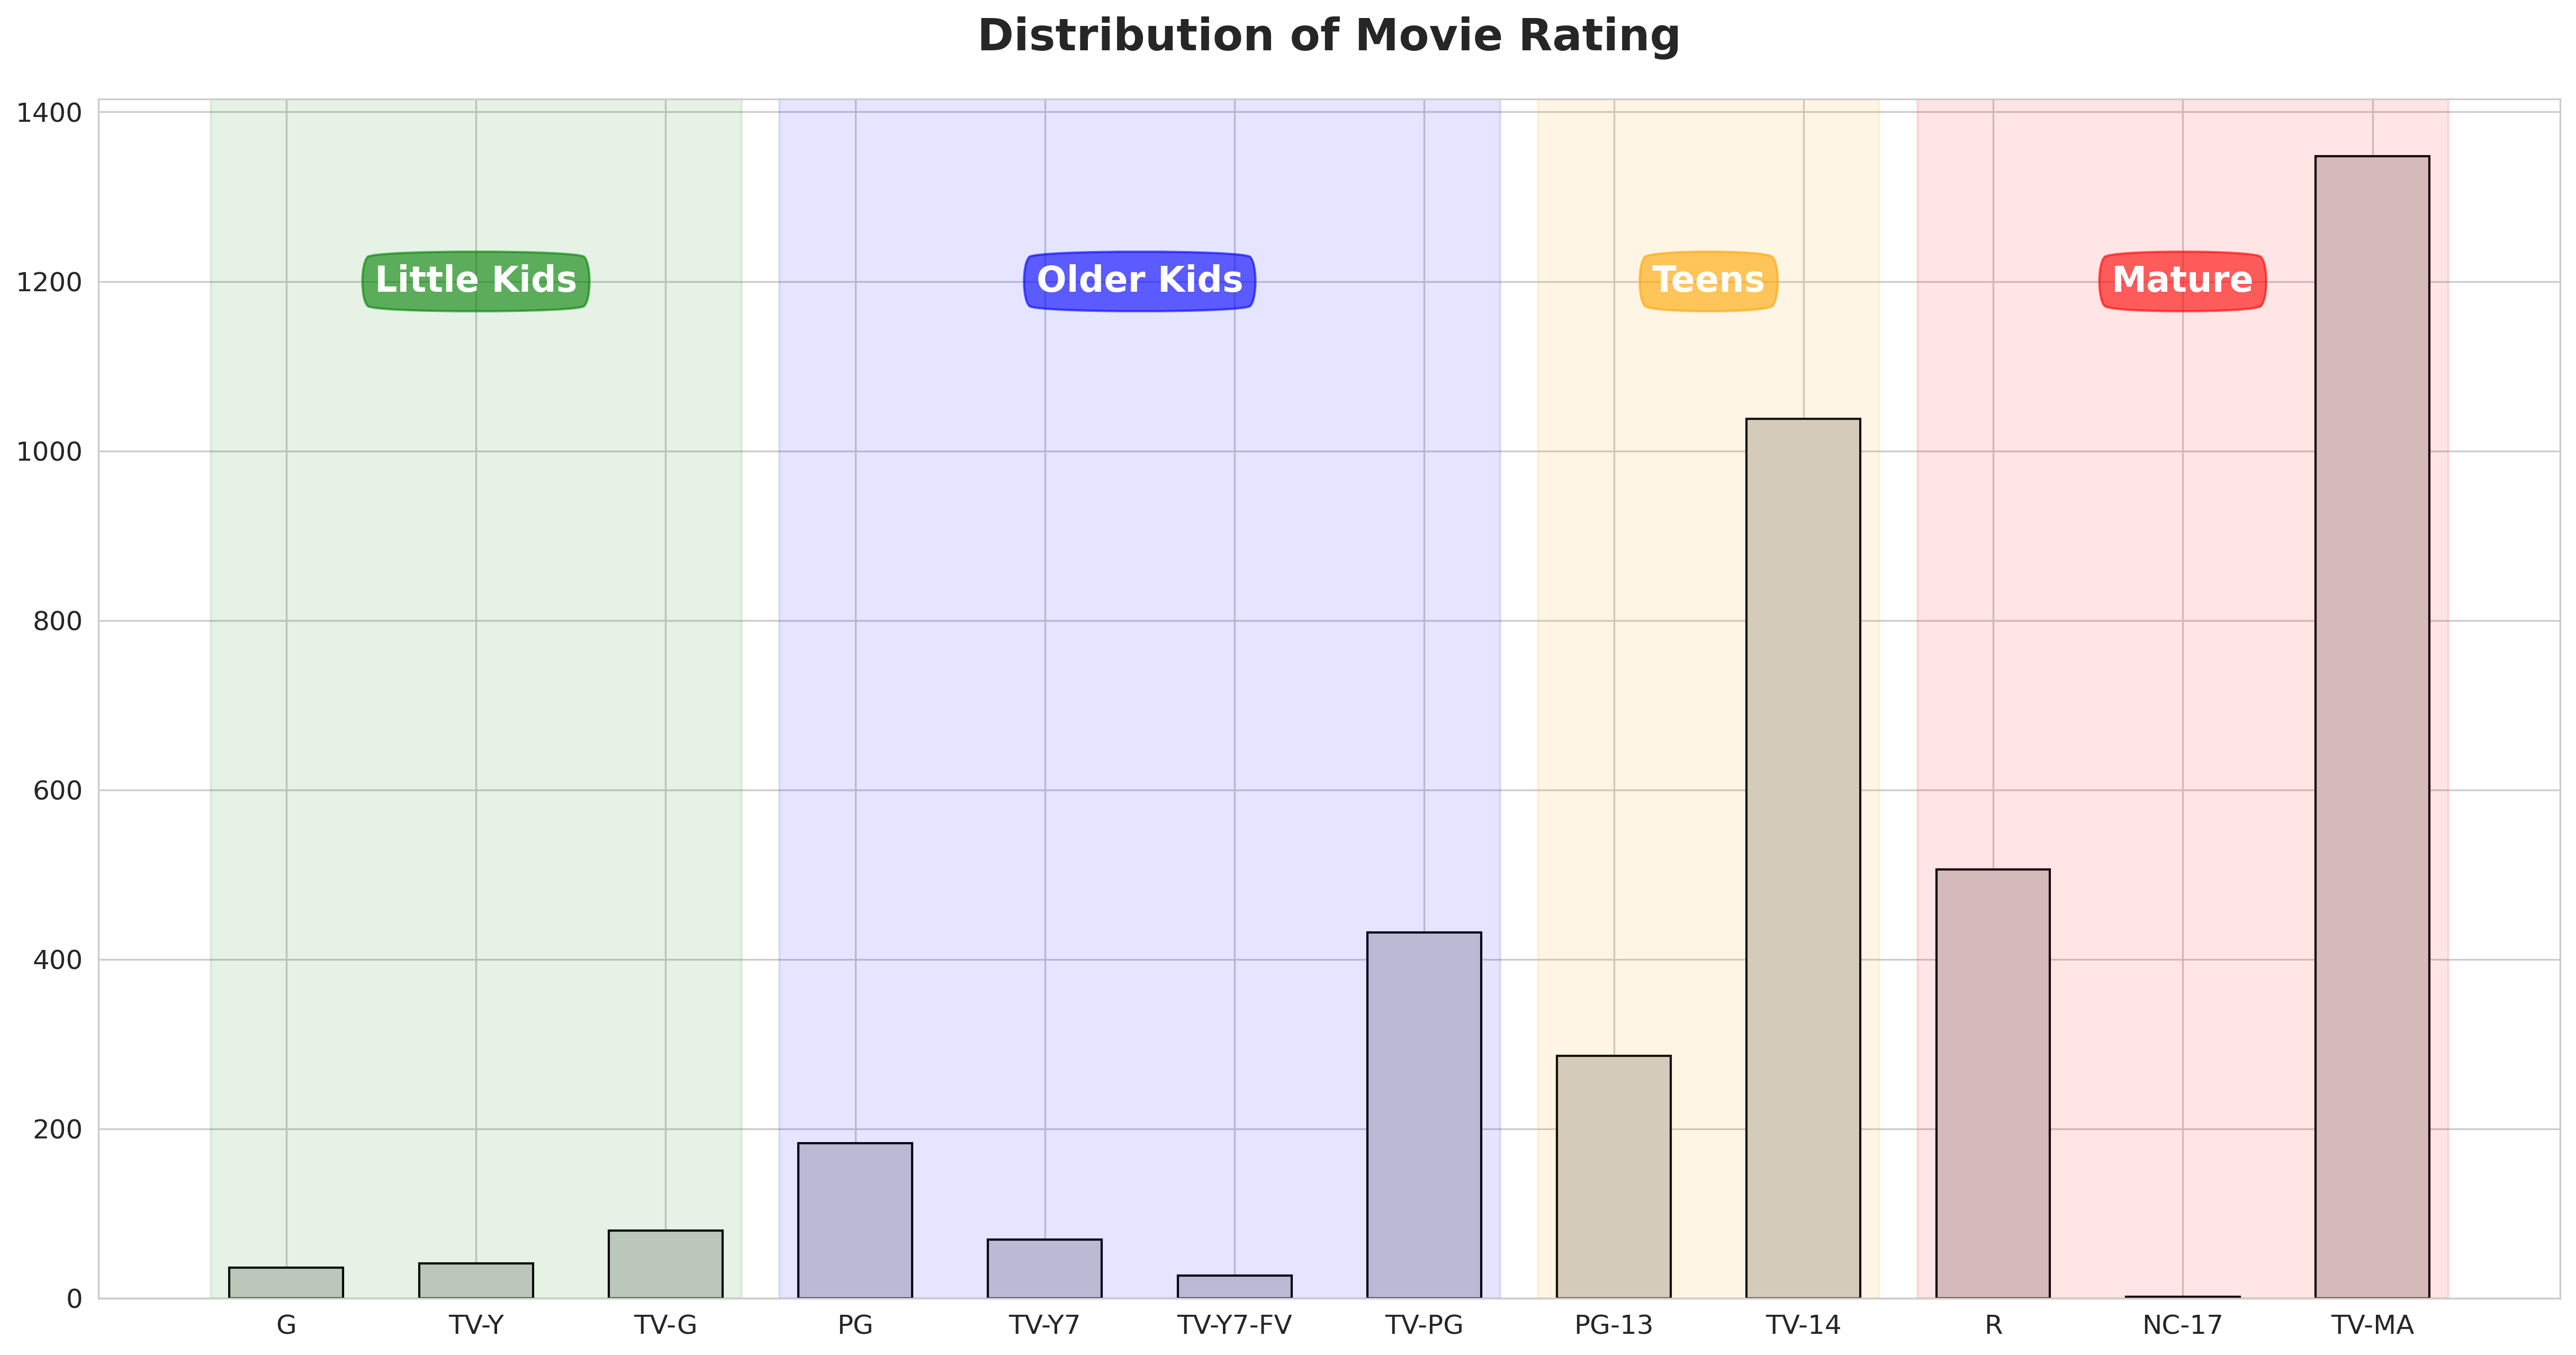

In [31]:
rating_barplot(movie_rating,'Movie', 1200)

In [32]:
rating_order_2 =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA']
tv_rating = tv_show['rating'].value_counts()[rating_order_2].fillna(0)

In [33]:
 def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(20, 10))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]
    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()

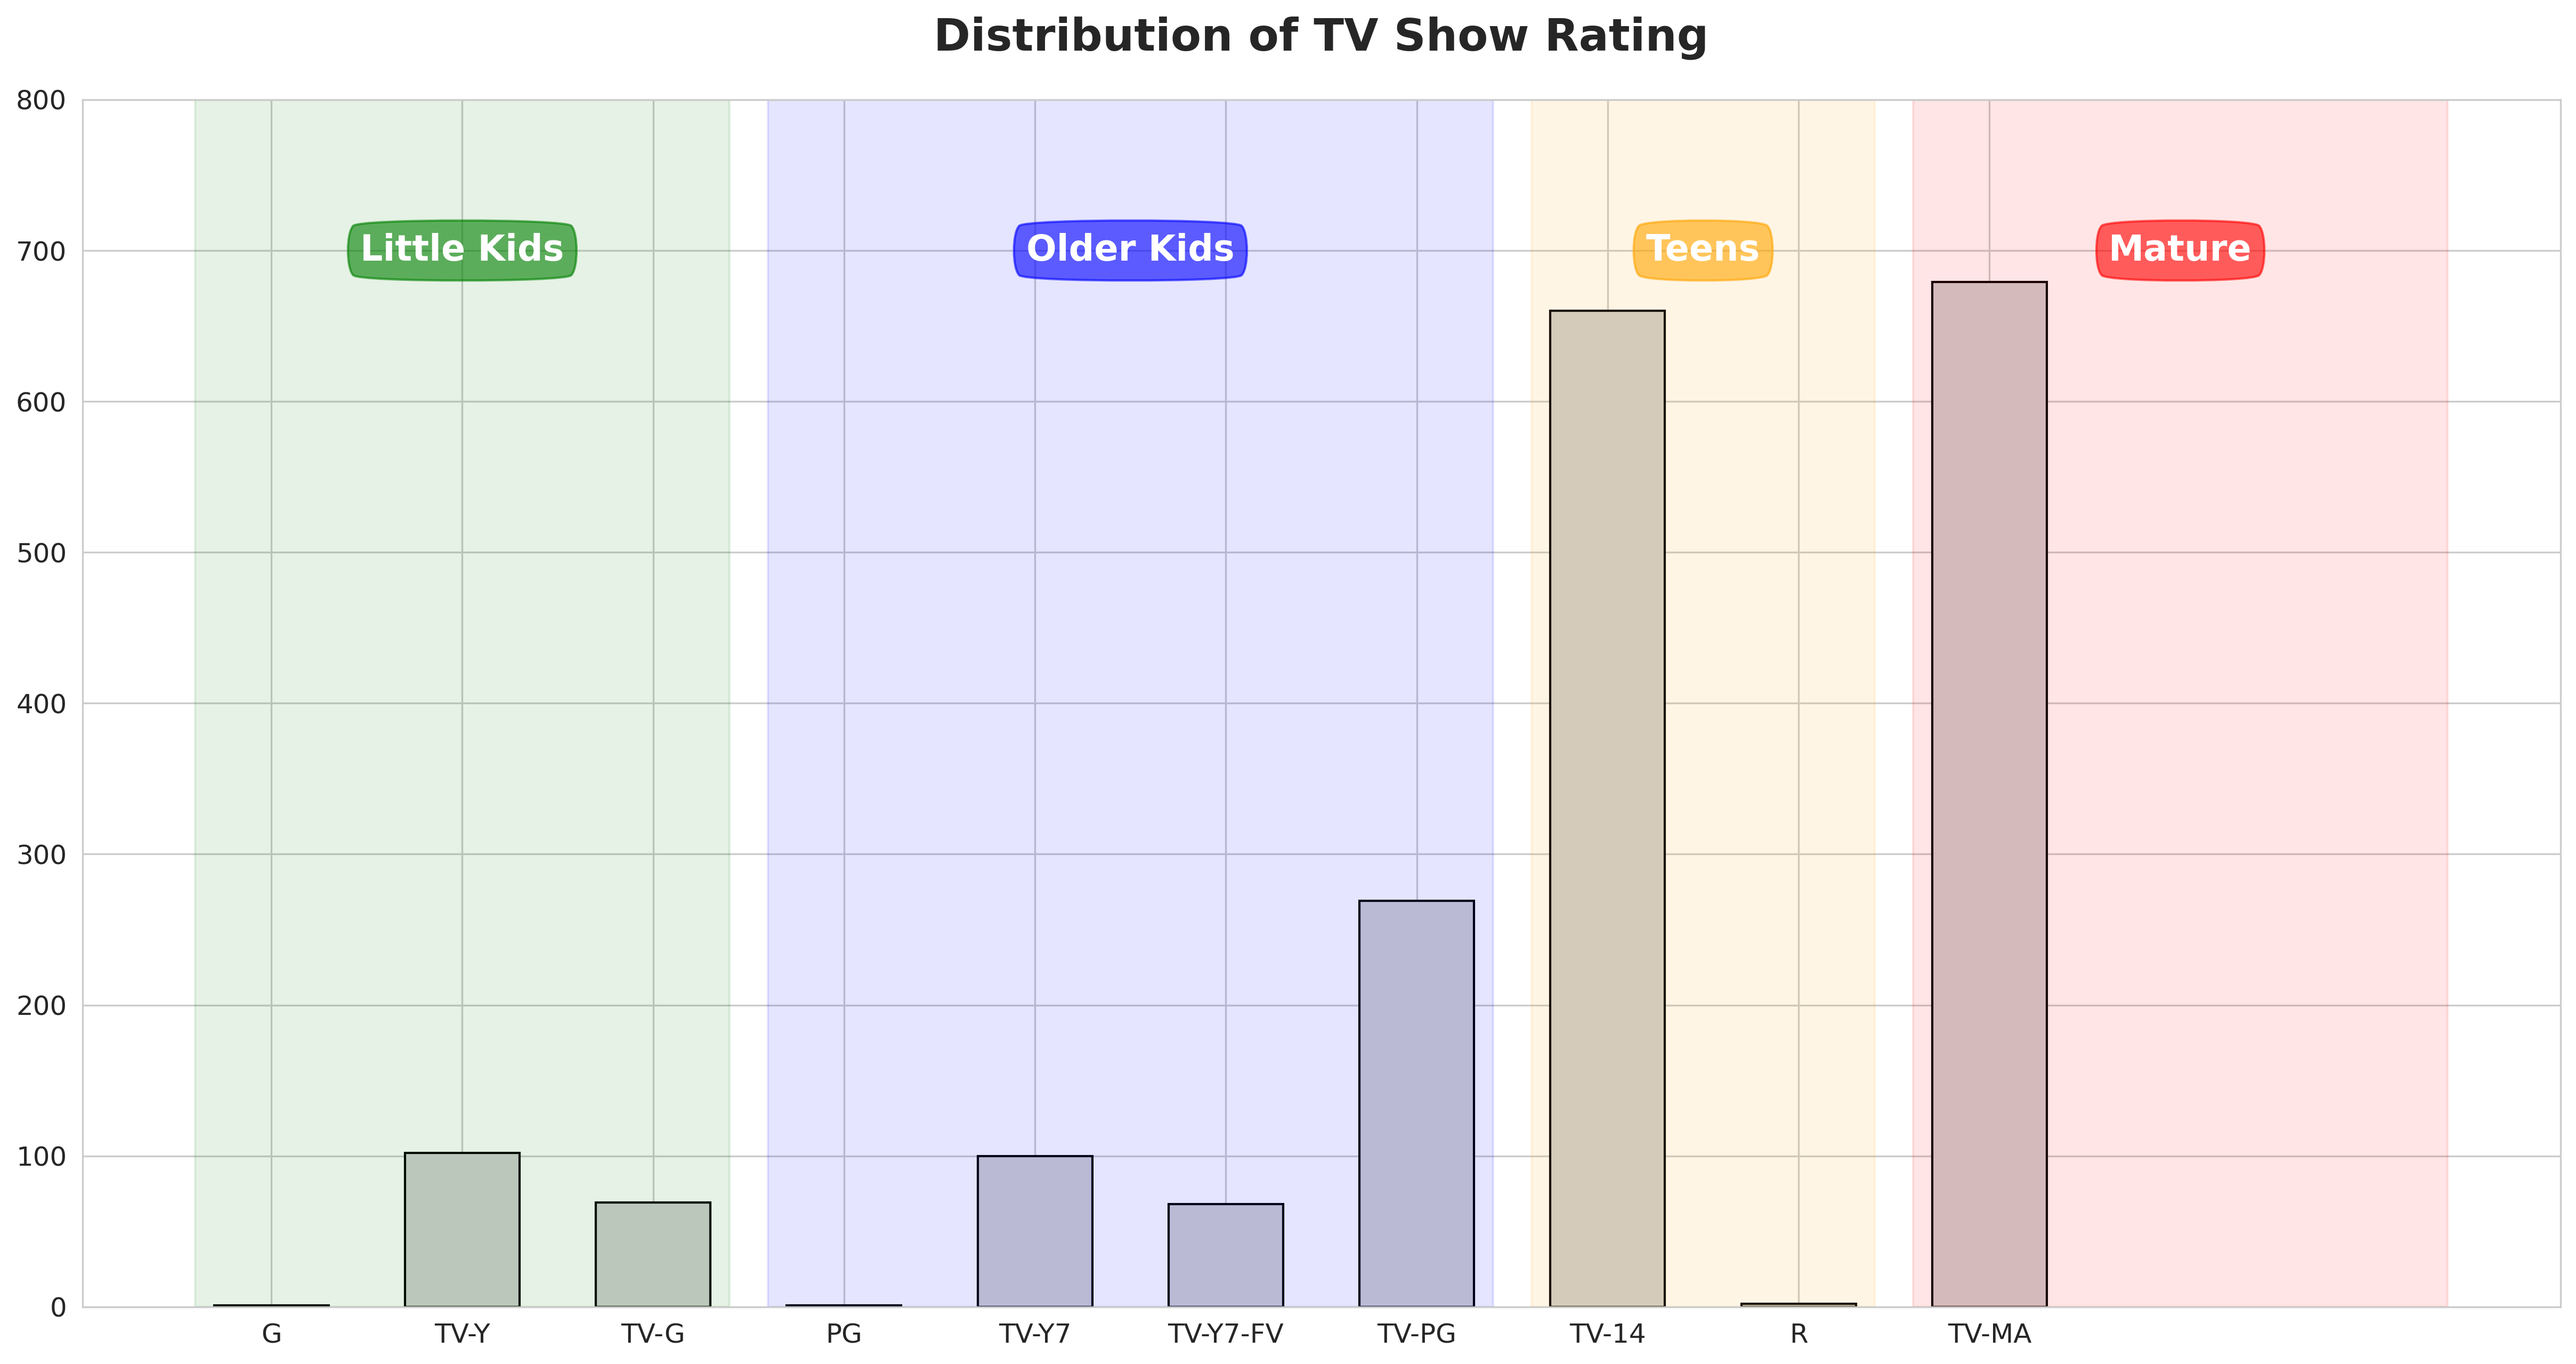

In [34]:
rating_barplot(tv_rating,'TV Show' , 700, 800)

In [35]:
rating_data = data[['rating', 'type']].groupby('type')['rating'].value_counts().unstack().fillna(0)[rating_order].T
rating_data = pd.DataFrame(pd.concat([rating_data['Movie'], rating_data['TV Show']])).reset_index().rename(columns={'rating':'rating',0:'cnt'})
rating_data['type'] = rating_data.index//12

In [36]:
data['tmp'] = 1
base = alt.Chart(rating_data).transform_calculate(
    type=alt.expr.if_(alt.datum.type == 0, 'Movie', 'TV Show')
).properties(
    height=300,
    width=300
)


color_scale = alt.Scale(domain=['Movie', 'TV Show'], range=['skyblue', 'salmon'])

left = base.transform_filter(
    alt.datum.type == 'Movie'
).encode(
    y=alt.Y('rating:O', axis=None, sort=rating_order),
    x=alt.X('cnt:Q',
            title='population',
            sort=alt.SortOrder('descending')),
    color=alt.Color('type:N', scale=color_scale, legend=None)
).mark_bar().properties(title='Movie')

middle = base.encode(
    y=alt.Y('rating', axis=None, sort=rating_order),
    text=alt.Text('rating'),
).mark_text().properties(width=30)

right = base.transform_filter(
    alt.datum.type == 'TV Show'
).encode(
    y=alt.Y('rating:O', axis=None, sort=rating_order),
    x=alt.X('cnt:Q', title='population'),
    color=alt.Color('type:N', scale=color_scale, legend=None)
).mark_bar().properties(title='TV Show')

alt.concat(left, middle, right, spacing=5)

alt.ConcatChart(...)

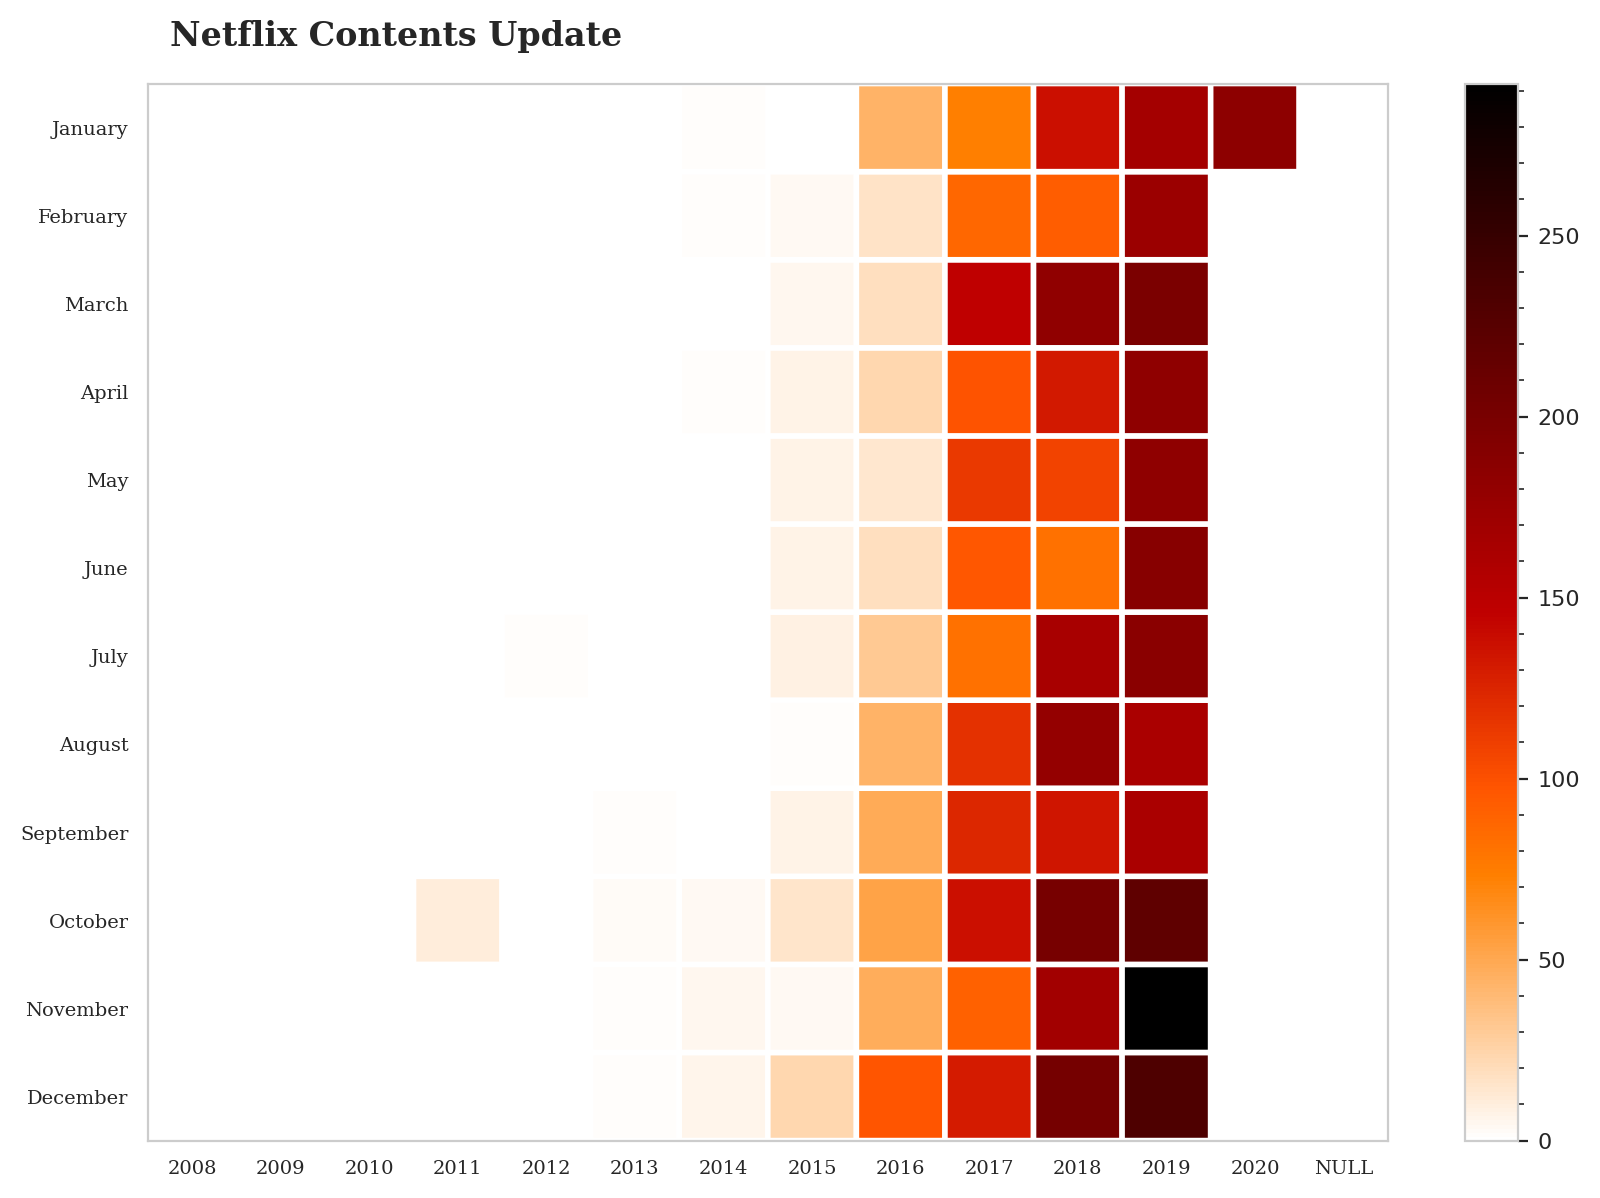

In [37]:
netflix_date = data[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(10, 7), dpi=200)
plt.pcolor(df, cmap='gist_heat_r', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7, fontfamily='serif')

plt.title('Netflix Contents Update', fontsize=12, fontfamily='serif', fontweight='bold', position=(0.20, 1.0+0.02))
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8) 
cbar.ax.minorticks_on()
plt.show()
